# <div style="padding: 35px;color:#FF5733;margin:10;font-size:60%;text-align:center;display:fill;border-radius:10px;border: 2px solid black;background-color:transparent;overflow:hidden;background-color:transparent"><b><span style='color:#FFFFFF'></span></b> <b>EKSPERIMEN MODEL REGRESI UNTUK PREDIKSI HARGA PROPERTI: PENGARUH MULTIKOLINEARITAS TERHADAP MODEL PARAMETRIK VS NON PARAMETRIK</b></div>

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FF5733"><b><span style='color:#FFFFFF'>1 |</span></b> <b>PENDAHULUAN</b></div>

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>1.1 LATAR BELAKANG MASALAH</span></b></p></div>

Banyak faktor yang mempengaruhi nilai properti rumah, seperti lokasi, ukuran bangunan, kondisi lingkungan sekitar, serta usia bangunan. Faktor-faktor ini sangat bervariasi antar properti. Pasar properti sendiri merupakan industri yang sangat fluktuatif, yang sangat bergantung pada perubahan permintaan dan penawaran, serta faktor ekonomi seperti suku bunga dan inflasi. Oleh karena itu, **memprediksi variasi harga properti seiring waktu adalah tantangan yang cukup besar.**

Keterbatasan data juga menjadi tantangan tersendiri dalam prediksi. Data properti dunia nyata sering kali memiliki fitur-fitur yang terbatas, akibatnya  prediksi harga properti sering kali tidak dapat memperhitungkan semua variabel yang relevan. Sehingga proses rekayasa fitur (_feature engineering_) sangat krusial untuk meningkatkan akurasi prediksi.

Selain itu, salah satu masalah yang sering muncul dalam prediksi harga properti adalah multikolinearitas. Multikolinearitas terjadi ketika dua atau lebih variabel prediktor dalam dataset memiliki korelasi tinggi satu sama lain, sehingga saling tumpang tindih dalam menjelaskan variasi target (harga properti). Ini bisa menjadi masalah khususnya dalam model parametrik, seperti regresi linier, karena akan membuat estimasi koefisien menjadi tidak stabil dan sulit diinterpretasikan.

Pada model parametrik, multikolinearitas dapat menyebabkan kenaikan varians dari koefisien, sehingga mengurangi kemampuan model untuk memprediksi secara akurat. Oleh karena itu, kita perlu mengidentifikasi dan menangani multikolinearitas dengan teknik seperti Variance Inflation Factor (VIF) atau dengan melakukan regularisasi pada model (Contoh: Ridge Regression).

Namun, dalam model non-parametrik seperti Random Forest dan XGBoost, multikolinearitas tidak menimbulkan masalah yang signifikan. Ini karena model ensemble berbasis tree memilih subset fitur secara acak untuk setiap pohon, sehingga dampak korelasi antar fitur tidak terlalu kuat dibandingkan model linier. [(Idaho State University)](https://ar5iv.labs.arxiv.org/html/2111.02513)

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>1.2 PENJELASAN DATASET YANG DIGUNAKAN</span></b></p></div>

`California housing dataset` berisi atribut terkait rumah untuk properti yang berlokasi di California, yang akan digunakan dalam studi ini. Dataset ini diambil dari bab kedua buku karya Aurélien Géron yang berjudul `Hands-On Machine Learning with Scikit-Learn and TensorFlow`. Dataset ini berisi informasi dari sensus California tahun 1990 dan merupakan buku pengantar yang sangat direkomendasikan untuk menerapkan algoritma pembelajaran mesin (_machine learning_). Dataset ini mencakup berbagai fitur/prediktor yang terkait dengan perumahan dan demografi di California, sehingga cocok untuk pembelajaran dasar-dasar machine learning. [(amazon.com)](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646).

**Berikut ini adalah kolom-kolom pada dataset California Housing:**

`Variabel Target:`

- median_house_value = Nilai median rumah rata-rata untuk lingkungan rumah tangga dalam satu blok (diukur dalam satuan Dolar AS)

`Variabel Predictor/Features:`
- longitude = Letak rumah berdasarkan koordinat geografi (semakin tinggi angkanya, semakin ke barat).
- latitude = Letak rumah berdasarkan koordinat geografi (semakin tinggi angkanya, semakin ke utara).
- housing_median_age = Median usia rumah; Semakin rendah angkanya, menandakan usia bangunan rumah yang masih muda, dan _vice versa_
- total_rooms = Jumlah ruangan pada rumah-rumah dalam suatu blok perumahan
- total_berdrooms = Jumlah kamar tidur pada rumah-rumah dalam suatu blok perumahan
- population = Jumlah total orang yang tinggal di dalam satu blok perumahan
- households = jumlah total rumah tangga, sekelompok orang yang tinggal dalam satu unit rumah, untuk satu blok perumahan
- median_income = Pendapatan rata-rata rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS; misal median income 1 = USD10000, median income 2.5 = USD25.000, dst.)
- ocean_proximity = Kedekatan lokasi dari area pesisir/ pantai/ laut

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>1.3 TUJUAN</span></b></p></div>

`Tujuan umum `

Memenuhi kewajiban penyusunan `Capstone Project Modul 3: Program Data Science and Machine Learning Purwadhika Digital School`. 

`Tujuan khusus`
- Memahami dan mendemonstrasikan bagaimana model-model sederhana hingga model yang lebih kompleks (seperti ensemble model) bekerja dengan memanfaatkan pustaka `scikit-learn`. Fokusnya bukan pada kesempurnaan model saja, tetapi juga pada pemahaman mendalam tentang proses pembuatan model dan bagaimana setiap jenis model bekerja secara teknis dan konseptual.
- Membandingkan performa berbagai model (sederhana hingga kompleks) untuk mengidentifikasi model mana yang paling efisien dalam hal kompleksitas, akurasi, dan kecepatan.
- Memahami teknik pengolahan dataset terbaik untuk model regresi, melalui proses pembersihan data, penanganan outliers, mengatasi multikolinearitas, serta melakukan rekayasa fitur (_feature engineering_) seperti normalisasi, scaling, encoding, dan pembuatan fitur baru.
- Melakukan evaluasi model dengan berbagai metrik, `seperti mean squared error` (MSE), `root mean squared error` (RMSE), dan `R-squared`, untuk memahami performa model dalam memprediksi variabel target.
- Menerapkan teknik validasi silang (`cross-validation`) guna memastikan bahwa model tidak overfitting dan mampu melakukan generalisasi dengan baik pada data baru.
- Menilai dampak Bayesian Optimization Hyperparameter Tuning pada performa model non-parametrik seperti Random Forest dan XGBoostRegresor, serta mengevaluasi peningkatan kinerja model setelah dilakukan tuning.
- Menghasilkan insight dari model yang dibangun mengenai faktor-faktor utama yang mempengaruhi harga rumah di California, untuk memahami bagaimana berbagai fitur mempengaruhi nilai properti.

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>1.4 MODEL YANG DIGUNAKAN</span></b></p></div>

- Rule-Based Model: Model sederhana yang saya kustomisasi sebagai pembanding untuk evaluasi performa.

**Model Linear Parametrik:**
- Linear Regression
- Ridge Regression

**Model Non-Parametrik:**
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Extreme Gradient Boosting

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, KFold

# StandardScaler digunakan pada model-model ensemble yang didesain tahan terhadap outliers. RobustScaler digunakan dalam Linear Regression
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler

#Imputasi dengan KNN Imputer
from sklearn.impute import KNNImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Tiga metrik evaluasi yang digunakan
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Model yang digunakan
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree
from xgboost import XGBRegressor

# Hyperparameter tuning yang digunakan
from bayes_opt import BayesianOptimization

# Menghitung skor vif untuk deteksi multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Library untuk visualisasi
import folium
import matplotlib.pyplot as plt  
import matplotlib.colors as mcolors 
import seaborn as sns

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FF5733"><b><span style='color:#FFFFFF'>2 |</span></b> <b>MENYIAPKAN DATA UNTUK MODELING</b></div>

In [3]:
df = pd.read_csv(r"C:\Users\tamar\Desktop\Folder Latihan\data_california_house.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0

In [4]:
# mengekstrak informasi missing_values, n_uniques, dan tipe data melalui satu fungsi --> cek_df
def cek_df(df):
    result = []
    for col in df:
        n_missings = df[col].isnull().sum()
        n_unique = df[col].nunique()
        data_type = df[col].dtypes
        result.append([col, n_missings,n_unique,data_type])
    return pd.DataFrame(result, columns=['Kolom', 'Jumlah Missing Values', 'Jumlah Unique Values', 'Tipe Data'])

cek_df(df).style.apply(lambda x: ['background-color: salmon' if x['Jumlah Missing Values'] > 0 else '' for _ in x], axis=1)

In [5]:
df.duplicated().sum()

0

- Dari tabel di atas, 137 missing values teridentifikasi pada kolom `total_bedrooms` yang merupakan kolom numerik kontinu
- Tidak ditemukan adanya data duplikat

---> Selanjutnya, missing values akan diimputasi dengan algoritma KNN Imputer:

### <div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>2.1 Mengatasi Missing Values dengan KNN Imputer</span></b></p></div>

KNN Imputer adalah teknik untuk mengisi nilai yang hilang (_missing values_) dalam dataset dengan menggunakan algoritma K-Nearest Neighbors (KNN). Teknik ini mengisi nilai yang hilang berdasarkan nilai dari data tetangga terdekat yang serupa. KNN Imputer menggunakan data yang ada untuk memperkirakan nilai yang hilang, sehingga `metode KNN imputer sering lebih akurat daripada metode imputasi sederhana seperti rata-rata atau median`.

Cara Kerja Algoritma:
- Pertama, algoritma mengidentifikasi nilai yang hilang dalam dataset.
- Untuk setiap nilai yang hilang, algoritma mencari sejumlah (K) tetangga terdekat yang memiliki data yang lengkap. K adalah parameter yang ditentukan sebelumnya (misalnya, K=3).
- Nilai yang hilang diisi dengan rata-rata (untuk data numerik) nilai-nilai K tetangga terdekat.
[(geeksforgeeks.com)](https://www.geeksforgeeks.org/how-knn-imputer-works-in-machine-learning/#:~:text=The%20KNN%20Imputer%20is%20a%20powerful%20tool%20for%20handling%20missing,imputation%20compared%20to%20traditional%20methods.).


In [6]:
numeric_df = df.select_dtypes(include='number') # pisahkan data numerik dari df, karena KNNImputer hanya bekerja pada data numerik

imputer = KNNImputer(n_neighbors=3)
# karena hasil imput berupa numpy.ndarray, kita perlu mengembalikannya ke dataframe:
df_imputed = pd.DataFrame (imputer.fit_transform(numeric_df),
                           columns=numeric_df.columns)
df_imputed.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income  median_house_value  
0       193.0        40.0         1.9750             47500.0  
1       836.0       277.0         2.2604            100000.0  
2      1387.0       364.0         6.2990            285800.0  
3      3051.0      1000.0         1.7199            175000.0  
4       606.0       167.0         2.2206             59200.0

In [7]:
#Kembalikan kolom 'ocean_proximity' pada df_imputed setelah imputasi
df_imputed['ocean_proximity'] = df['ocean_proximity']
df_imputed.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income  median_house_value ocean_proximity  
0       193.0        40.0         1.9750             47500.0          INLAND  
1       836.0       277.0         2.2604            100000.0        NEAR BAY  
2      1387.0       364.0         6.2990            285800.0       <1H OCEAN  
3      3051.0      1000.0         1.7199            175000.0       <1H OCEAN  
4       606.0       167.0         2.2206             59200.0          INLAND

In [8]:
# re-cek df setelah imputasi
cek_df(df_imputed)

Kolom  Jumlah Missing Values  Jumlah Unique Values Tipe Data
0           longitude                      0                   806   float64
1            latitude                      0                   836   float64
2  housing_median_age                      0                    52   float64
3         total_rooms                      0                  5227   float64
4      total_bedrooms                      0                  1834   float64
5          population                      0                  3498   float64
6          households                      0                  1649   float64
7       median_income                      0                  9797   float64
8  median_house_value                      0                  3548   float64
9     ocean_proximity                      0                     5    object

Sekarang jumlah missing values pada seluruh kolom adalah 0. Selanjutnya, kita bisa memvisualisasikan distribusi nilai masing-masing kolom numerik:

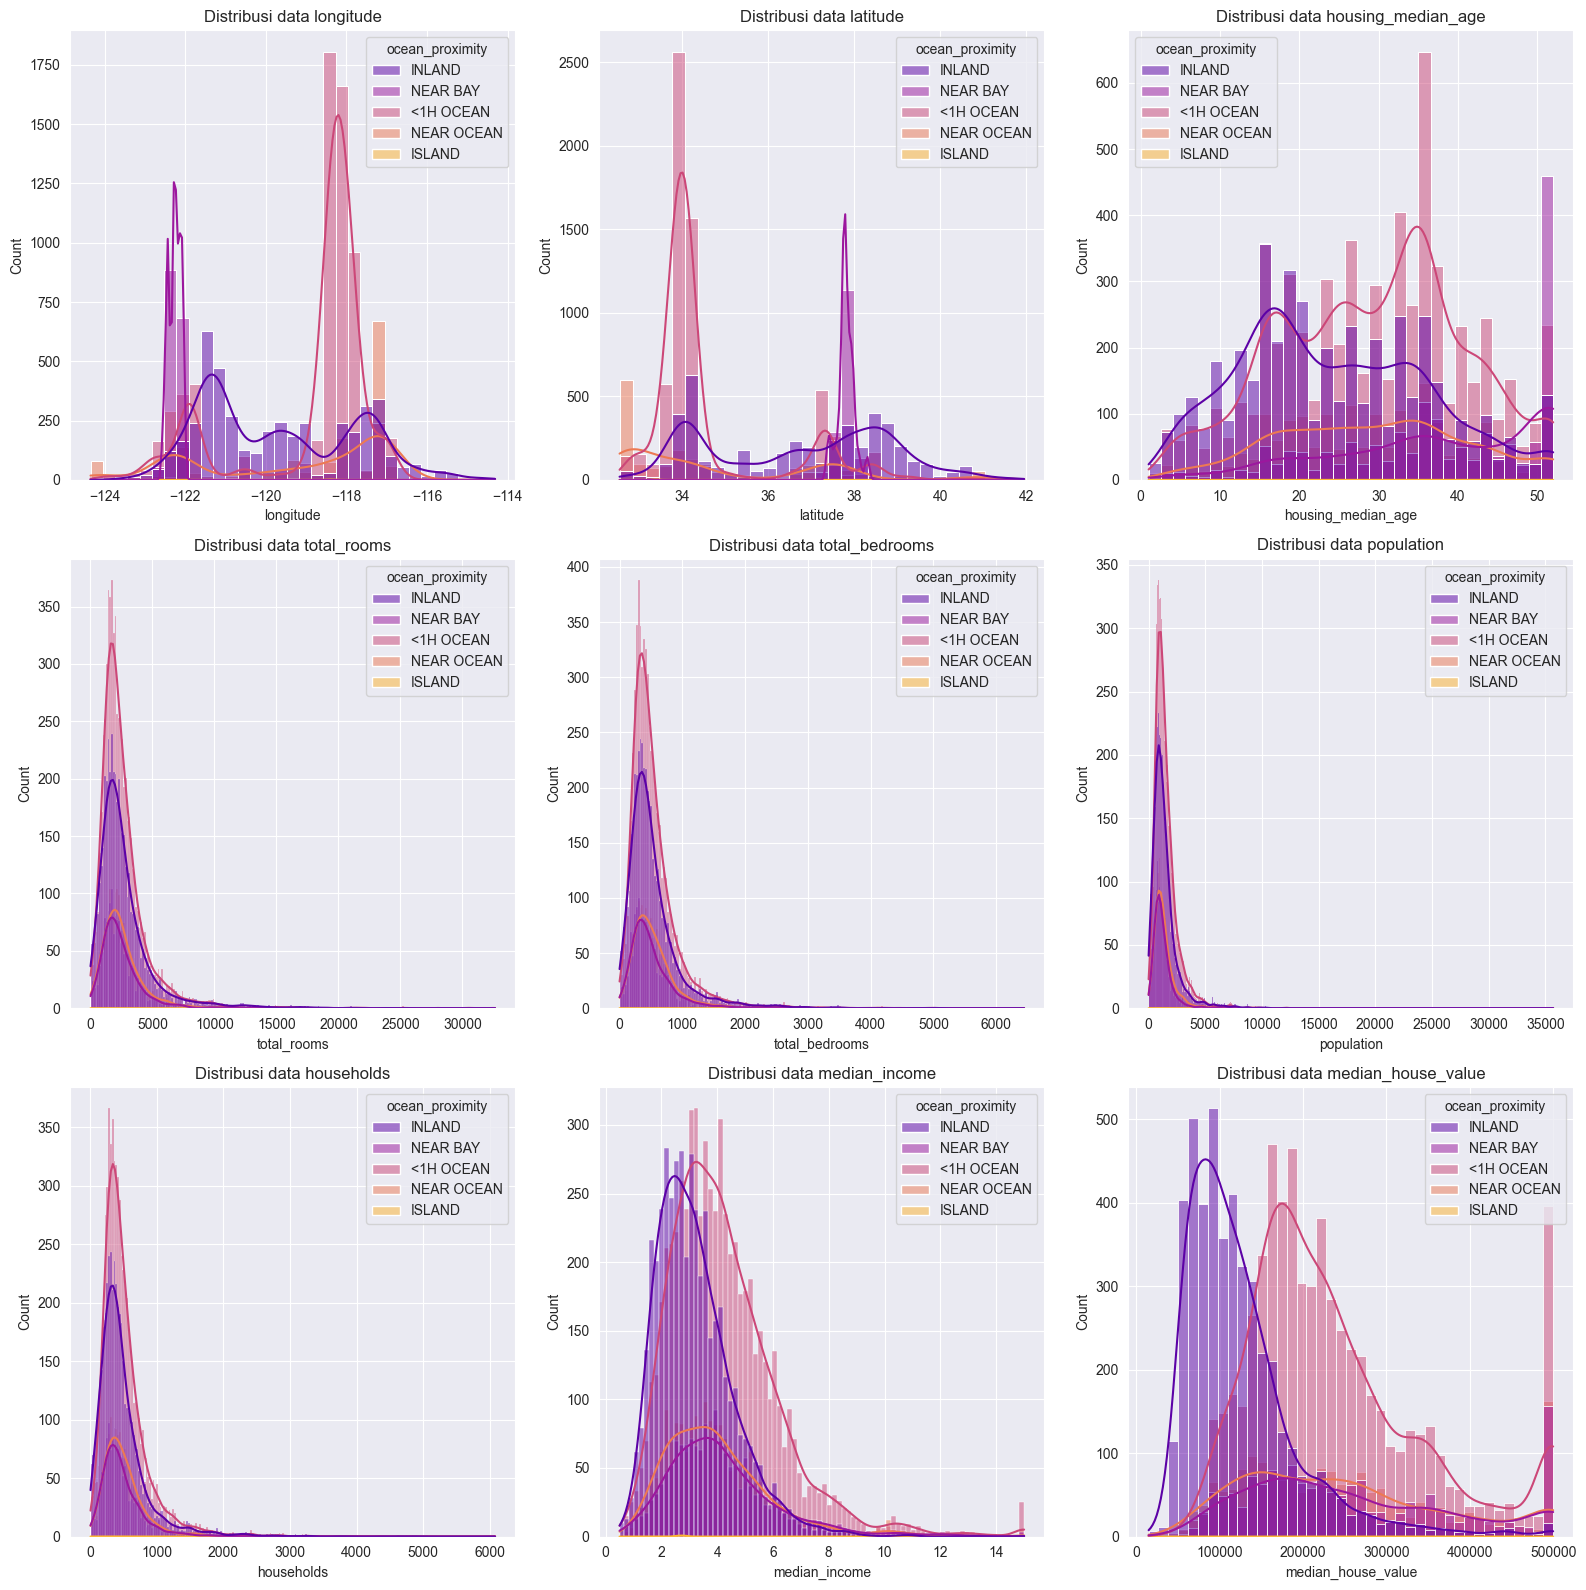

In [9]:
plt.figure(figsize=(16,16))
sns.set_style('darkgrid')

for i, col in enumerate(df_imputed.columns):
    if df_imputed[col].dtypes == 'float64':  
        plt.subplot(3, 3, (i + 1))  
        sns.histplot(df_imputed, x=col, hue='ocean_proximity', palette='plasma', kde=True)  
        plt.title(f"Distribusi data {col}")  

plt.tight_layout()

- Dari visualisasi ini, terlihat bahwa wilayah geografis (ocean proximity) memiliki pengaruh yang signifikan terhadap distribusi nilai `median_house_value` dan karakteristik lainnya. Wilayah yang lebih dekat ke laut atau pantai (NEAR OCEAN, NEAR BAY) umumnya memiliki nilai `median_house_value` dan `median_income` yang lebih tinggi. 

- Sementara itu, wilayah INLAND memiliki lebih banyak variasi, termasuk area-area dengan nilai `population`, `total_rooms`, dan `total_bedrooms` yang sangat tinggi.

- Usia bangunan berkisar antara 0 hingga 50 tahun, di mana banyak rumah yang usianya antara 20 hingga 30 tahun. Puncak distribusi di usia 50 tahun menandakan bahwa ada cukup banyak bangunan yang berusia lebih tua, mungkin tidak ada bangunan yang lebih dari 50 tahun karena datasetnya diambil dari sensus tahun 1990.

- `median_income` memiliki distribusi yang lebih mendekati normal dibandingkan variabel lainnya, tetapi tetap sedikit skewed ke kanan. Mayoritas rumah tangga memiliki pendapatan di bawah USD 60.000, dengan beberapa outliers yang berpendapatan lebih dari USD 100.000. Outliers >100000 ini wajar, mengingat kita sedang menganalisa properti di salah satu negara bagian paling kaya di Amerika.

- Distribusi skewed yang terlihat pada beberapa variabel, seperti `total_rooms, total_bedrooms, population, dan households` menandakan adanya outliers yang signifikan pada dataset, sehingga memerlukan penanganan khusus.

- `total_rooms, total_bedrooms, population, dan households` memiliki bentuk distribusi yang mirip, yang menandakan adanya korelasi

---> Oleh karena itu, selanjutnya kita akan menginspeksi outliers dengan metode IQR:

### <div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>2.2 Inspeksi Outliers dengan Metode IQR</span></b></p></div>

Keberadaan outliers dapat memberikan dampak signifikan terhadap akurasi model machine learning. Jika outliers tidak terdeteksi dan ditangani dengan tepat, hal ini dapat menyebabkan overfitting, underfitting, atau hasil yang bias. Misalnya, dalam prediksi harga properti rumah, keberadaan outliers seperti harga rumah yang jauh lebih tinggi atau lebih rendah dari rata-rata harga di suatu area, dapat membuat model memprediksi harga dengan tidak akurat, sehingga menyebabkan kesalahan dalam estimasi nilai pasar properti tersebut. [(The Importance of Outlier Detection in Machine Learning)](https://medium.com/@yennhi95zz/the-importance-of-outlier-detection-in-machine-learning-methods-and-implementation-in-python-125e3d5ada7d)

Metode Interquartile Range (IQR) adalah teknik yang umum digunakan untuk mendeteksi outliers dalam data. IQR mengukur seberapa jauh nilai-nilai data tersebar di sekitar median dengan fokus pada distribusi antara kuartil pertama (Q1) dan kuartil ketiga (Q3), yang dikenal sebagai rentang interkuartil.
- Q1 (Kuartil 1) adalah nilai yang membagi 25% data terendah.
- Q3 (Kuartil 3) adalah nilai yang membagi 75% data terendah.
- IQR = Q3 - Q1.
- Nilai yang lebih rendah dari Q1 - 1.5 * IQR atau lebih tinggi dari Q3 + 1.5 * IQR dianggap sebagai outliers.

[(doc.scipy.org)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html)

Pertama-tama kita inspeksi dahulu outliers pada data dengan melihat visual boxplot distribusi masing-masing kolom:

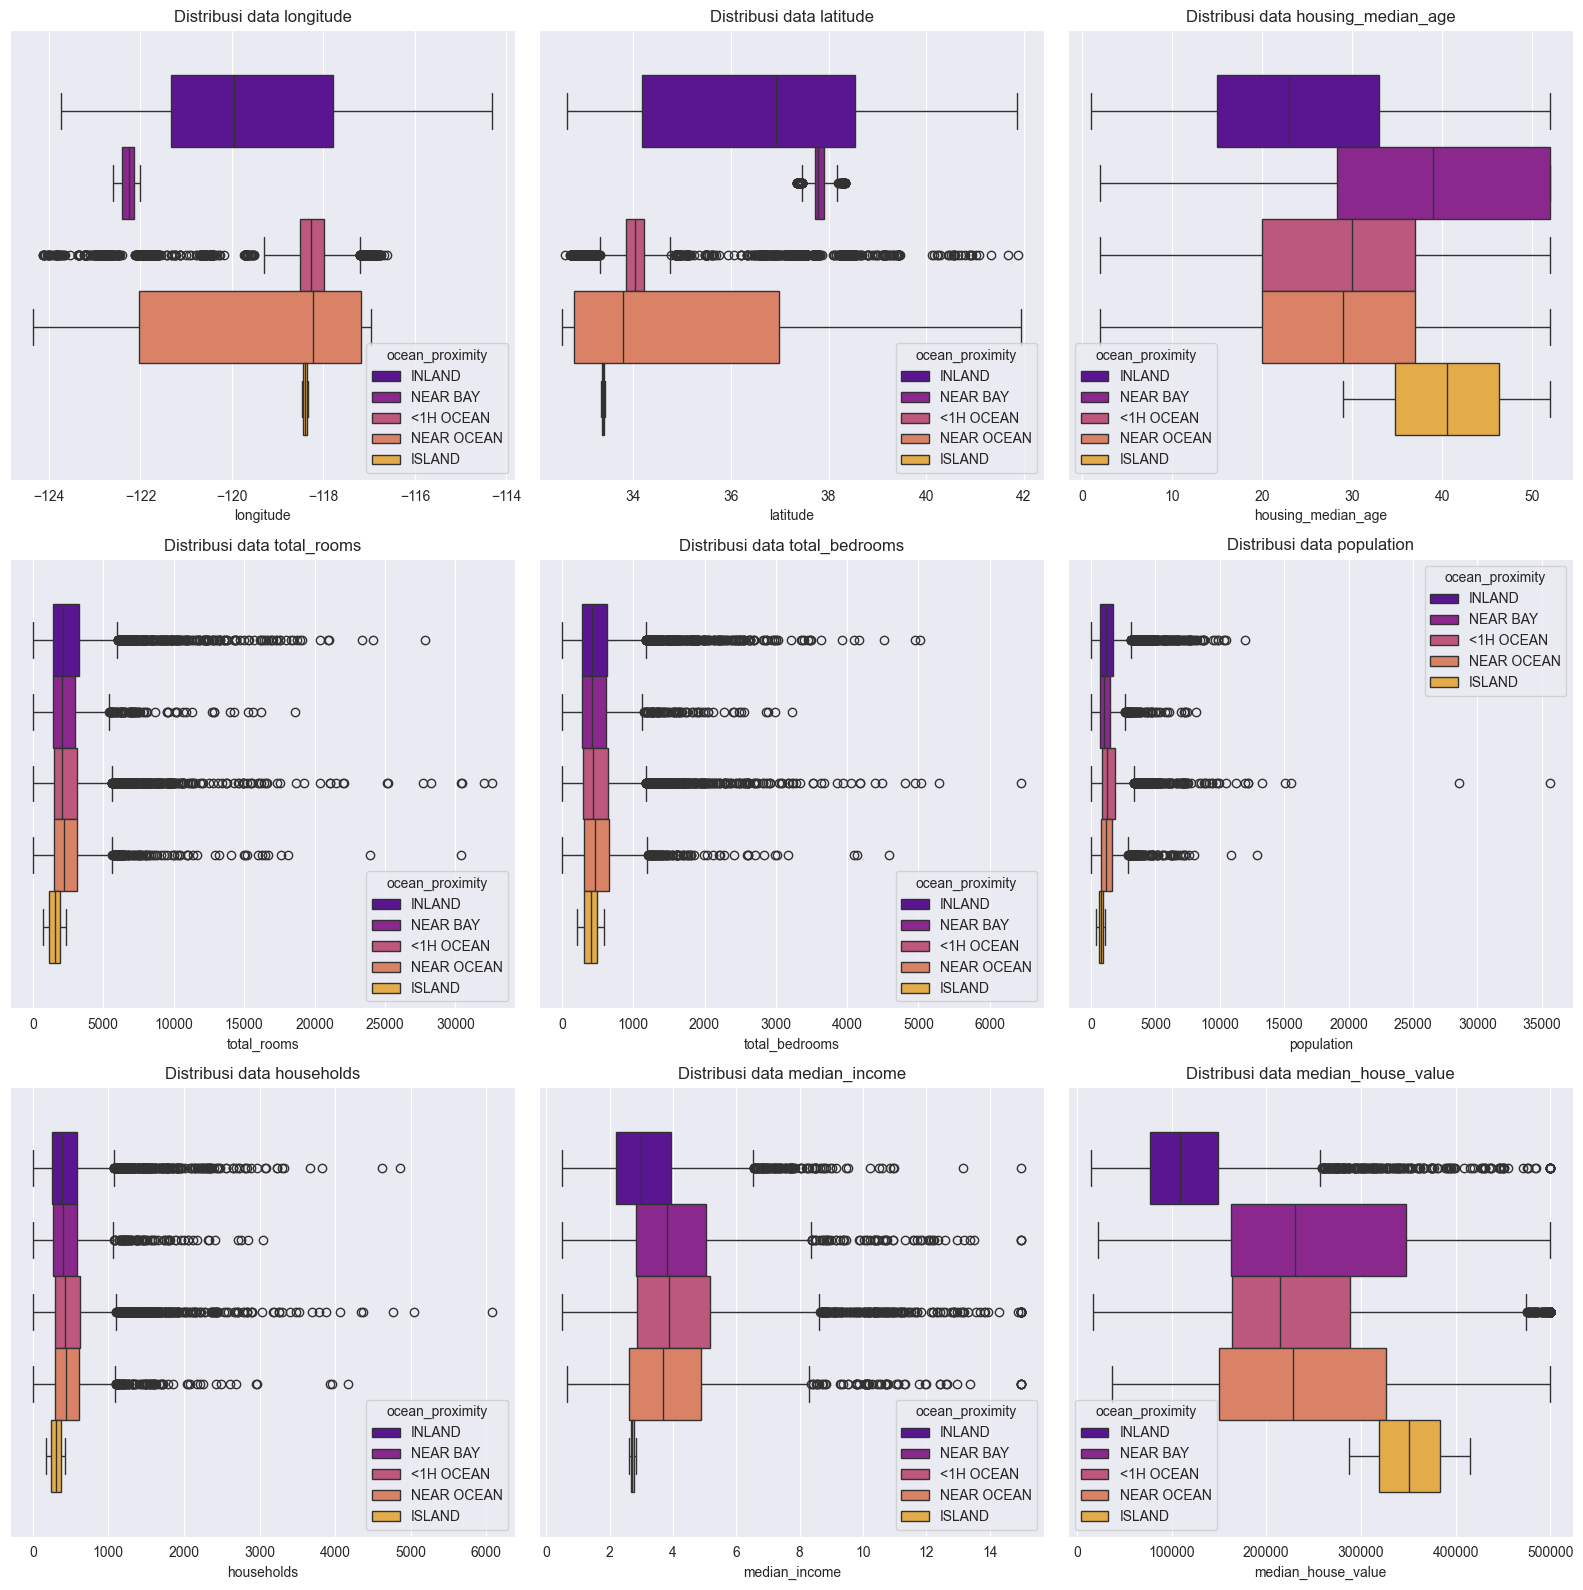

In [10]:
plt.figure(figsize=(16,16))
sns.set_style('darkgrid')

for i, col in enumerate(df_imputed.columns):
    if df_imputed[col].dtypes == 'float64':  
        plt.subplot(3, 3, (i + 1))  
        sns.boxplot(df_imputed, x=col, hue='ocean_proximity', palette='plasma')  
        plt.title(f"Distribusi data {col}")  

plt.tight_layout()  # Agar subplot tidak tumpang tindih

- Outliers di atas Q3 pada hampir semua kolom menunjukkan bahwa ada beberapa properti yang jauh lebih besar atau memiliki karakteristik yang sangat ekstrem dibandingkan dengan rata-rata rumah dalam dataset.
- Outliers ini dapat disebabkan oleh properti komersial besar, gedung apartemen, atau area dengan pendapatan yang jauh di atas rata-rata. Properti-properti tersebut, meskipun valid, bisa jadi memerlukan penanganan khusus untuk mencegah distorsi dalam prediksi harga properti khususnya jika menggunakan model parametrik seperti linear regression.

In [11]:
# fungsi filter outliers pada kolom-kolom numerik menggunakan metode IQR
def find_outliers(df):
    for col in df:
        if df[col].dtypes == 'float64':
            Q1=df[col].quantile(0.25)
            Q3=df[col].quantile(0.75)
            IQR = Q3-Q1
            filtered = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    return filtered

df_no_outliers = find_outliers(df_imputed) #simpan dataset tanpa outliers dengan nama berbeda
df_no_outliers.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income  median_house_value ocean_proximity  
0       193.0        40.0         1.9750             47500.0          INLAND  
1       836.0       277.0         2.2604            100000.0        NEAR BAY  
2      1387.0       364.0         6.2990            285800.0       <1H OCEAN  
3      3051.0      1000.0         1.7199            175000.0       <1H OCEAN  
4       606.0       167.0         2.2206             59200.0          INLAND

In [12]:
#re-cek df setelah filter outliers
cek_df(df_no_outliers)

Kolom  Jumlah Missing Values  Jumlah Unique Values Tipe Data
0           longitude                      0                   803   float64
1            latitude                      0                   836   float64
2  housing_median_age                      0                    52   float64
3         total_rooms                      0                  5074   float64
4      total_bedrooms                      0                  1810   float64
5          population                      0                  3469   float64
6          households                      0                  1625   float64
7       median_income                      0                  9188   float64
8  median_house_value                      0                  3498   float64
9     ocean_proximity                      0                     5    object

In [13]:
#Perbandingan jumlah row antara data dengan outliers dan tanpa outliers
print(df_imputed.shape, df_no_outliers.shape)

(14448, 10) (13691, 10)


### <div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>2.3 Membandingkan Performa Data dengan Outliers vs Tanpa Outliers pada Model Rule-Based</span></b></p></div>

_Rule-based model_ adalah model sederhana yang mengikuti aturan logika "if-then" yang mudah dipahami. Dalam eksperimen, _rule-based model_ berfungsi sebagai baseline untuk menilai apakah model yang lebih canggih (seperti model machine learning) bisa memberikan peningkatan yang signifikan dalam hal akurasi atau kinerja.Sebagai baseline model, _rule-based model_ sangat cepat dan efisien karena tidak memerlukan penyesuaian parameter.

Untuk membangun rule-based model pada kasus ini, perhatikan kedua visualisasi di bawah ini:

In [14]:
min_price = df['median_house_value'].min()
max_price = df['median_house_value'].max()
colormap = plt.get_cmap('plasma')  # Menggunakan plt.get_cmap untuk peta warna

# Membuat peta
latitude_center = df['latitude'].mean()
longitude_center = df['longitude'].mean()
map = folium.Map(location=[latitude_center, longitude_center], zoom_start=7)

# Mengambil sampel dari data untuk mengurangi jumlah titik yang divisualisasikan
sampled_df = df.sample(frac=0.2, random_state=1)  # Menampilkan 20% dari data agar filesize ipynb tidak terlalu besar

# Menambahkan CircleMarker dengan warna berdasarkan harga
for index, row in sampled_df.iterrows():
    # Normalisasi harga agar berada di antara 0 dan 1
    norm_price = (row['median_house_value'] - min_price) / (max_price - min_price)
    
    # Mengubah harga ke warna dengan to_hex
    color = mcolors.to_hex(colormap(norm_price)) #semakin cerah warnanya, semakin tinggi median harga rumah

    # Tambahkan CircleMarker dengan radius lebih kecil dan tanpa tooltip untuk reduksi filesize
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # Mengurangi radius
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7  # Mengurangi opacity untuk visualisasi lebih sederhana
    ).add_to(map)

map

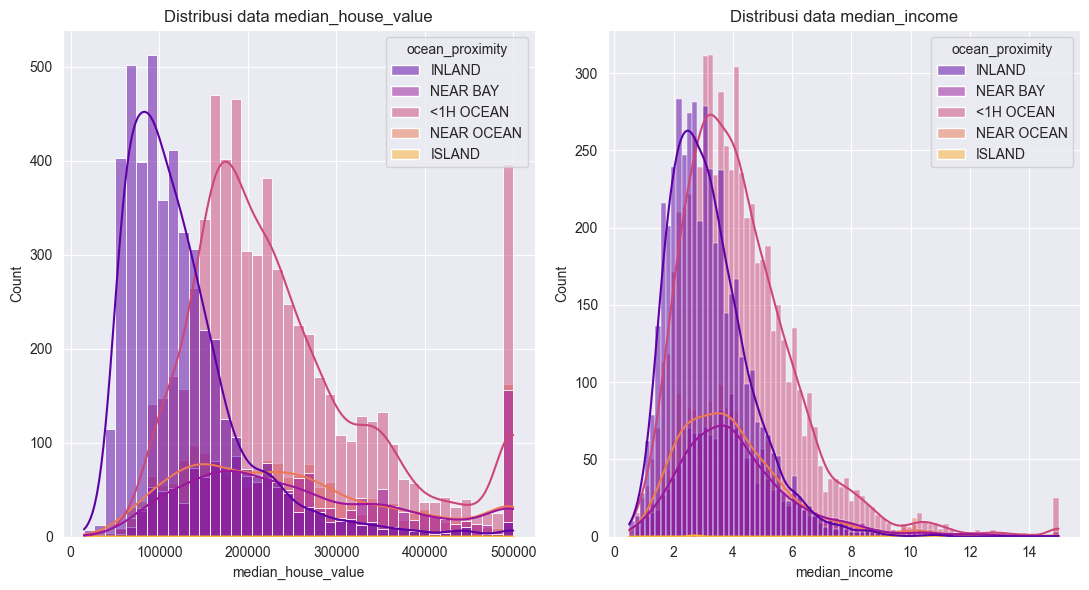

In [15]:
plt.figure(figsize=(11,6))
sns.set_style('darkgrid')

for i, col in enumerate(df_imputed[['median_house_value','median_income']]):
    if df_imputed[col].dtypes == 'float64':  
        plt.subplot(1, 2, (i + 1))  
        sns.histplot(df_imputed, x=col, hue='ocean_proximity', palette='plasma', kde=True)  
        plt.title(f"Distribusi data {col}")  

plt.tight_layout()

In [16]:
df_imputed[['median_house_value', 'median_income']].describe() # Guide untuk menentukan rentang nilai pada rule-based

median_house_value  median_income
count        14448.000000   14448.000000
mean        206824.624516       3.866667
std         115365.476182       1.891158
min          14999.000000       0.499900
25%         119600.000000       2.570600
50%         180000.000000       3.539100
75%         263900.000000       4.736100
max         500001.000000      15.000100

#### <div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>2.3.1 Rule-Based Model dengan Data yang Masih Memiliki Outliers (`df_imputed`)</span></b></p></div>

Dari kedua visualisasi di atas, mengingat bahwa:
- Dari folium map, terlihat bahwa banyak harga properti tinggi (kuning) di dekat pantai, dan
- `median_house_value` memiliki bentuk distribusi yang paling mirip dengan `median_income`,

maka, rule-basednya adalah sebagai berikut:

In [17]:
def rule_based_model(df):
    # Rumah "ISLAND"
    if "ISLAND" in df['ocean_proximity']:
        if df['median_income'] > 2.5:
            return 351000
    
    # Rumah kurang dari 1 jam ke pesisir laut
    elif "<1H OCEAN" in df['ocean_proximity']:
        if df['median_income'] > 3.5:
            return 260000
        elif 2.5 <= df['median_income'] <= 3.5:
            return 180000
        elif df['median_income'] < 2.5:
            return 119000
    
    # Rumah "Near Ocean" dan "Near Bay"
    elif "NEAR" in df['ocean_proximity']:
        if df['median_income'] > 3.5:
            return 264000
        elif 2.5 <= df['median_income'] <= 3.5:
            return 180000
        elif df['median_income'] < 2.5:
            return 119000
        
    else:
        if df['median_income'] > 3.5:
            return 119000
        if 2.5 <= df['median_income'] <= 3.5:
            return 100000
        if df['median_income'] < 2.5:
            return 80000

In [18]:
X = df_imputed.drop('median_house_value', axis=1) # Prediktor/Fitur
y = df_imputed['median_house_value'] # Target

In [19]:
def rule_based_eval (model,X,y): # fungsi evaluasi model rule-based (tanpa cross val)
    results = {}

    preds = X.apply(model, axis = 1)
    rmse = root_mean_squared_error(y, preds)
    mae = mean_absolute_error(y, preds)
    r2 = r2_score(y, preds)

    results['RMSE'] = round(rmse, 3)
    results['MAE'] = round(mae, 3)
    results['R²'] = round(r2, 3)

    return (results)

In [20]:
rb_df = pd.DataFrame(rule_based_eval(rule_based_model,X,y), index=['Rule Based Model (Outliers Tidak Dihapus)'])
rb_df

RMSE        MAE    R²
Rule Based Model (Outliers Tidak Dihapus)  92293.268  64165.779  0.36

#### <div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>2.3.2 Rule-Based Model dengan Data Tanpa Outliers (`df_no_outliers`)</span></b></p></div>

In [21]:
X = df_no_outliers.drop('median_house_value', axis=1) # Prediktor/Fitur
y = df_no_outliers['median_house_value'] # Target

In [22]:
rb_df2 = pd.DataFrame(rule_based_eval(rule_based_model,X,y), index=['Rule Based Model (Tanpa Outliers)'])
pd.concat ([rb_df,rb_df2])

RMSE        MAE    R²
Rule Based Model (Outliers Tidak Dihapus)  92293.268  64165.779  0.36
Rule Based Model (Tanpa Outliers)          74306.075  53998.218  0.39

- Pada model tanpa outliers, RMSE dan MAE menurun, dan R² sedikit meningkat.
- RMSE (Root Mean Squared Error) pada model tanpa outliers turun dari sekitar 92,293 menjadi 74,306, yang berarti kesalahan prediksi model menjadi lebih kecil setelah outliers dihilangkan.
- MAE (Mean Absolute Error) juga turun dari sekitar 64,165 menjadi 53,998, artinya kesalahan absolut rata-rata model dalam melakukan prediksi berkurang setelah outliers dihapus.
- R² meningkat dari 0.36 menjadi 0.39, yang menunjukkan bahwa model tanpa outliers sedikit lebih baik dalam menjelaskan variabilitas data.

`Ini menandakan bahwa outliers mempengaruhi kinerja model secara negatif, terutama dalam meningkatkan error prediksi yang besar, yang terlihat jelas dari perbedaan signifikan pada nilai RMSE dan MAE. Oleh karena itu, pada eksperimen-eksperimen model regresi selanjutnya di bawah ini, saya akan menggunakan data tanpa outliers.`

### Mengapa RMSE, MAE, dan R² Adalah Metrik Terbaik dalam Konteks Bisnis Prediksi Properti?

#### RMSE (Root Mean Squared Error)

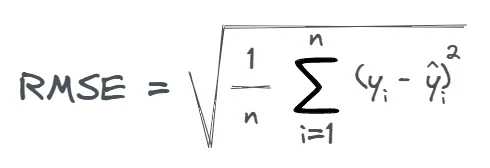

- n adalah jumlah total data yang digunakan
- yi adalah nilai aktual dan y^ adalah prediksinya
- selisih nilai aktual dan prediksinya kemudian dikuadratkan agar hasilnya positif, dan kesalahan besar memiliki bobot lebih tinggi
- setelah menjumlahkan kuadrat dari semua kesalahan, hasilnya dibagi dengan jumlah data (n) untuk mendapatkan rata-rata kesalahan kuadrat
- terakhir, diambil akar kuadrat dari rata-rata kesalahan kuadrat tersebut (kalau MSE tidak ada tahap ini sehingga nilainya sangat besar)

RMSE adalah ukuran deviasi (penyimpangan) rata-rata prediksi model dari nilai sebenarnya. Namun, deviasi ini dikuadratkan terlebih dahulu sebelum dihitung rata-ratanya, sehingga semua nilai kesalahan (baik positif maupun negatif) menjadi positif dan jadi lebih besar (karena dikuadratkan).

Sehingga, RMSE memberikan `penalti` yang lebih besar untuk kesalahan besar (outliers), yang sangat penting dalam konteks bisnis properti. Kesalahan besar dalam memprediksi harga properti yang tinggi atau rendah dapat berdampak signifikan pada keputusan investasi dan keuntungan bisnis. `RMSE membantu kita untuk mengidentifikasi model mana yang lebih efektif dalam menghindari kesalahan prediksi yang besar`.


#### MAE (Mean Absolute Error)

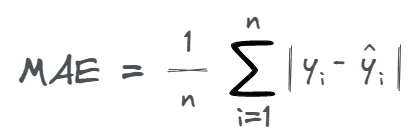

- n adalah jumlah total data yang digunakan
- yi adalah nilai aktual dan y^ adalah prediksinya
- selisih antara nilai aktual dan prediksinya dihitung, kemudian diambil nilai absolutnya |..| (tanpa memperhitungkan apakah selisih tersebut positif atau negatif).
- setelah menjumlahkan kuadrat dari semua kesalahan, hasilnya dibagi dengan jumlah data (n) untuk mendapatkan rata-rata kesalahan kuadrat
- setelah semua nilai absolut dari selisih ini dijumlahkan, hasilnya dibagi dengan jumlah data (n) untuk mendapatkan rata-rata dari kesalahan absolut.

MAE adalah ukuran kesalahan rata-rata antara nilai prediksi model dengan nilai sebenarnya. Dalam MAE, tidak ada tahap kuadrat seperti pada RMSE, sehingga setiap kesalahan dihitung secara linear (proporsional dengan besar kesalahannya). Karena itu, MAE memberikan ukuran yang lebih "seimbang" untuk semua kesalahan, baik yang kecil maupun besar, tanpa memberikan "penalti" lebih pada kesalahan besar (outliers).

MAE cenderung lebih mudah diinterpretasikan karena hasilnya adalah kesalahan rata-rata dalam satuan yang sama dengan data asli (misalnya, us dollar jika kita memprediksi harga properti dalam us dollar).

Namun, karena tidak mengkuadratkan kesalahan, MAE tidak terlalu sensitif terhadap outliers (kesalahan besar) dibandingkan RMSE. Dalam konteks bisnis properti, `MAE berguna untuk memberikan gambaran umum tentang kesalahan rata-rata, tetapi tidak sekuat RMSE dalam menunjukkan seberapa besar pengaruh outliers` (kesalahan besar dalam memprediksi harga properti yang sangat jauh dari nilai sebenarnya).

#### R-squared (R²)

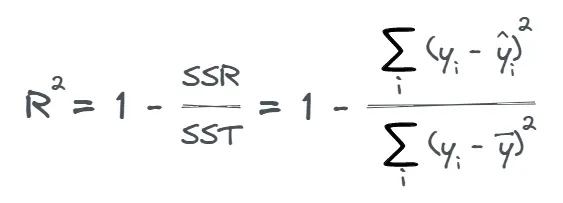

- SSR (_Sum of Squared Residuals_) adalah jumlah dari kuadrat selisih antara nilai aktual dan nilai prediksi --> kuadrat dari (yi-y^)
- SST (Total Sum of Squares) adalah jumlah dari kuadrat selisih antara nilai aktual dan rata-rata nilai aktual. Jadi, SST adalah jumlah variasi dalam data

R² = 1 - (SSR/SST) --> Singkatnya, rumus ini membandingkan seberapa besar kesalahan model (SSR) dibandingkan dengan total variasi dalam data (SST).

- Jika R² = 1, artinya model sempurna dalam menjelaskan variasi data.
- Jika R² = 0, model tidak lebih baik daripada sekadar memprediksi rata-rata nilai aktual.
- Nilai negatif bisa terjadi jika model sangat buruk dalam menjelaskan data.

Dalam konteks prediksi harga properti, `R² menunjukkan seberapa besar faktor-faktor seperti lokasi, luas tanah, dan fitur lainnya menjelaskan perbedaan harga rumah`. Semakin tinggi R², semakin baik model dalam memahami dan memprediksi harga berdasarkan faktor-faktor tersebut.

Kesimpulan---> - RMSE menjaga model tetap waspada terhadap kesalahan besar yang bisa mengakibatkan keputusan buruk dalam investasi.
               - MAE memberikan ukuran kesalahan yang mudah dimengerti dalam konteks bisnis dan memberikan gambaran tentang kesalahan prediksi rata-rata.
               - R² menunjukkan seberapa baik model mampu menjelaskan variasi dalam data, memastikan model tidak hanya akurat, tetapi juga relevan dalam konteks bisnis.

### <div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>2.4 Membuat Fitur Baru</span></b></p></div>

In [23]:
# Menambahkan fitur-fitur baru untuk menambahkan keakuratan prediksi dan memberikan 'informasi baru' kepada model
# fitur-fitur baru dibuat setelah filter outliers karena fitur baru yang dibuat sebelum filter outliers dapat menambah noise
df_new = df_no_outliers.copy()

df_new['room_per_household'] = round(df_new['total_rooms']/df_new['households'],1)
df_new['room_per_capita'] = round(df_new['total_rooms']/df_new['population'],1)
df_new['bed_room_ratio'] = round(df_new['total_bedrooms']/df_new['total_rooms'],1)
df_new['income_per_capita'] = round(df_new['median_income']/df_new['population'],1)
df_new.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       193.0        40.0         1.9750             47500.0          INLAND   
1       836.0       277.0         2.2604            100000.0        NEAR BAY   
2      1387.0       364.0         6.2990            285800.0       <1H OCEAN   
3      3051.0      1000.0         1.7199            175000.0       <1H OCEAN   
4       606.0       167.0         2.2206             59200.0          INLAND   

   room_per_household  room_per_capita  bed_room_ratio  income_per_capita  
0                 2.8              0.6             0.2                0.0  
1                 3.7              1.2             0.3                0.0  
2                 6.5              1.7             0.2                0.0  
3                 2.5              0.8             0.5                0.0  
4                 4.6              1.3             0.3                0.0

- `room_per_household` --> Perkiraan jumlah ruangan per rumah tangga bisa menjadi indikator yang baik untuk menggambarkan `ukuran rumah`
- `room_per_capita` --> Perkiraan jumlah orang dalam suatu ruang bisa menjadi `ukuran kelapangan atau kenyamanan sebuah rumah`
- `bed_room_ratio` --> Rasio kamar tidur terhadap jumlah ruangan(`proporsi kamar tidur dari total jumlah ruangan`), jika nilainya kecil menandakan bahwa rumah lebih sederhana dan memiliki lebih sedikit ruang non-kamar tidur
- `income_per_capita` --> Mengukur pendapatan rata-rata per individu dalam sebuah wilayah

In [24]:
# re-cek df baru
cek_df(df_new).style.apply(lambda x: ['background-color: salmon' if x['Jumlah Unique Values'] == 52 else '' for _ in x], axis=1)

Dari hasil fungsi cek_df di atas, jumlah unique values pada kolom `housing_median_age` tidak terlalu banyak sehingga kita bisa melakukan binning. Usia bangunan sering kali tidak perlu dipertimbangkan satu per satu. Binning bisa lebih informatif dengan membagi usia bangunan menjadi kelompok seperti gedung baru, sedang, tua, atau menggunakan rentang tahun tertentu seperti 0-10 tahun, 11-20 tahun, dll. Ini juga akan mempermudah analisis dan visualisasi data.

Binning juga dapat meningkatkan interpretasi model atau analisis karena fitur tersebut akan lebih mudah dihubungkan dengan tren umum yang berhubungan dengan nilai properti. Misalnya, kategori "rumah baru" bisa memiliki nilai yang lebih tinggi daripada "rumah tua".

In [25]:
bins = [0, 19, 29, 100]  # misalnya, rumah baru, rumah sedang, rumah tua
labels = ['New', 'Medium', 'Old']
df_new['age_binned_custom'] = pd.cut(df['housing_median_age'], bins=bins, labels=labels, right=False)

- Los Angeles adalah salah satu kota terbesar dan paling penting di Amerika Serikat. Sebagai pusat industri hiburan dan ekonomi, LA memiliki banyak daya tarik, baik bagi penduduk lokal maupun internasional. Properti yang lebih dekat ke LA cenderung memiliki harga yang lebih tinggi. Oleh karena itu, saya menambahkan fitur `distance_to_LA`

- Selain itu, Silicon Valley adalah pusat teknologi dunia, rumah bagi perusahaan teknologi raksasa seperti Google, Apple, Facebook, dan banyak startup lainnya. Kawasan ini dikenal sebagai pusat inovasi teknologi dan ekonomi, serta sebagai tempat tinggal bagi banyak profesional teknologi dengan pendapatan yang tinggi. Properti yang berada di dekat Silicon Valley cenderung memiliki harga yang jauh lebih tinggi. Oleh karena itu, saya juga menambahkan fitur `distance_to_silicon_valey`

[(us.sganalytics.com)](https://us.sganalytics.com/blog/most-expensive-cities-in-the-US-and-world/)

In [26]:
# Perlu install geopy terlebih dahulu ---> pip install geopy
from geopy.distance import geodesic

def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).kilometers

# Menambahkan fitur jarak ke Los Angeles
los_angeles_coords = (34.0522, -118.2437)
df_new['distance_to_LA'] = df.apply(lambda row: calculate_distance(row['latitude'], row['longitude'], los_angeles_coords[0], los_angeles_coords[1]), axis=1)

sil_valey_coords = (37.3875, -122.0575)
df_new['distance_to_silicon_valey'] = df.apply(lambda row: calculate_distance(row['latitude'], row['longitude'], sil_valey_coords[0], sil_valey_coords[1]), axis=1)

In [27]:
cek_df(df_new)

Kolom  Jumlah Missing Values  Jumlah Unique Values  \
0                   longitude                      0                   803   
1                    latitude                      0                   836   
2          housing_median_age                      0                    52   
3                 total_rooms                      0                  5074   
4              total_bedrooms                      0                  1810   
5                  population                      0                  3469   
6                  households                      0                  1625   
7               median_income                      0                  9188   
8          median_house_value                      0                  3498   
9             ocean_proximity                      0                     5   
10         room_per_household                      0                   187   
11            room_per_capita                      0                   114   
12             bed_room_ratio                      0                    10   
13          income_per_capita                      0                     8   
14          age_binned_custom                      0                     3   
15             distance_to_LA                      0                  9430   
16  distance_to_silicon_valey                      0                  9430   

   Tipe Data  
0    float64  
1    float64  
2    float64  
3    float64  
4    float64  
5    float64  
6    float64  
7    float64  
8    float64  
9     object  
10   float64  
11   float64  
12   float64  
13   float64  
14  category  
15   float64  
16   float64

### <div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>2.5 Multikolinearitas</span></b></p></div>

Multikolinearitas terjadi ketika dua atau lebih variabel independen dalam model regresi sangat berkorelasi satu sama lain. Artinya, variabel-variabel tersebut saling memberikan informasi yang sangat mirip. Multikolinearitas dapat menyebabkan masalah dalam analisis parametrik(regresi linear, dll).

Namun, ketika menggunakan model ensemble, model justru memanfaatkan berbagai subset variabel. Jadi, meskipun ada korelasi antar variabel, model dapat "mengabaikan" multikolinearitas dengan memilih subset yang berbeda dari variabel-variabel tersebut dalam berbagai trees. Ini bisa membantu model menemukan lebih banyak informasi yang relevan dengan target variabel.

Fitur yang berkorelasi dapat memperkuat sinyal dalam data. Pada model non-parametrik berbasis tree, fitur-fitur yang berkorelasi justru bisa memberikan lebih banyak informasi kepada model karena fitur-fitur tersebut bisa digunakan secara bergantian dalam decission tree yang berbeda. Dalam banyak kasus, variabel yang sangat berkorelasi tidak saling mengganggu kinerja model, tetapi justru membantu dalam memprediksi target dengan lebih baik. [(Applied Linear Statistical Models by Kutner (2005))](https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a)

**Metode untuk Inspeksi Korelasi:**
- Matriks Korelasi
- Variance Inflation Factor (VIF)

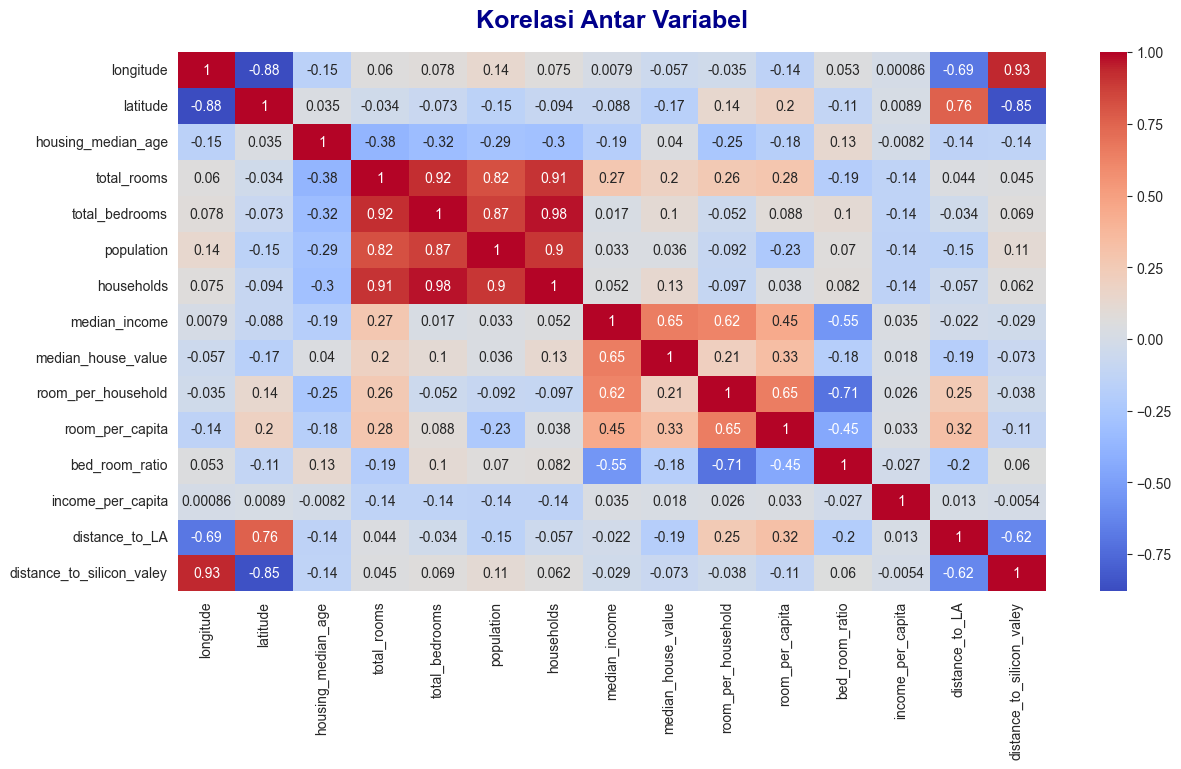

In [28]:
def visualize_correlation(df): # fungsi pembuatan heatmap korelasi
    correlation_matrix = df.corr(method='spearman')
    plt.figure(figsize=(14,7))
    sns.set_style('darkgrid')

    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
    plt.title ("Korelasi Antar Variabel", pad=18, fontdict={
                                                        'color': 'darkblue',
                                                        'weight': 'bold',
                                                        'fontsize': 18

    })

visualize_correlation(df_new.select_dtypes(include='number'))

**Dari heatmap korelasi di atas terlihat bahwa:**

---> Variabel `total_rooms` memiliki korelasi kuat dengan `households` (0.91), `population` (0.82), dan `total_bedrooms` (0.92). Hal ini tidak mengherankan, karena semakin banyak ruangan dalam suatu lingkungan, kemungkinan besar disebabkan oleh kamar tidur yang banyak. Selain itu, populasi yang  besar bisa dikarenakan oleh jumlah rumah tangga yang besar pula, sehingga menciptakan kebutuhan akan lebih banyak ruang hunian untuk menampung mereka. Hubungan ini mencerminkan keterkaitan yang logis antara faktor-faktor demografis dan infrastruktur hunian.

---> Variabel `Latitude` dan `Longitude` juga memiliki korelasi negatif kuat (-0.88). Ini wajar, mengingat bahwa biasanya semakin besar Latitude (ke arah utara), biasanya Longitude akan lebih cenderung berkurang, terutama di wilayah tertentu yang membentang secara diagonal.

---> `Latitude` dan `Longitude` memiliki korelasi yang relatif rendah terhadap `median_house_value` (-0.057 dan -0.17). Ini menunjukkan bahwa posisi geografis (secara longitude dan latitude) tidak memiliki pengaruh yang sangat signifikan terhadap harga properti. Namun, ini mungkin karena longitude dan latitude di sini terlalu umum untuk menunjukkan kedekatan dengan pusat kota atau pantai.

---> `median_income` memiliki korelasi negatif yang signifikan dengan variabel fisik seperti `room_per_household` (-0.55) dan `room_per_capita` (-0.71). Artinya, area dengan pendapatan yang lebih tinggi cenderung memiliki rumah yang lebih kecil atau lebih sedikit kamar per rumah tangga, mungkin karena lokasi-lokasi tersebut adalah area perkotaan dengan properti yang lebih mahal tetapi lebih kecil.


Dalam `model regresi linier`, multikolinearitas ini dapat menimbulkan masalah karena model akan sulit dalam menentukan pengaruh independen masing-masing variabel terhadap nilai target. Namun, untuk model ensemble seperti Random Forest atau XGBoost, masalah ini cenderung tidak terlalu mempengaruhi performa model karena model tersebut lebih robust terhadap multikolinearitas.

------
- Dalam model linier, masing-masing fitur data harus memiliki skor vif di bawah 10 (rekomendasi).
- VIF (_Variance Inflation Factor_) adalah ukuran seberapa besar varians koefisien regresi meningkat karena multikolinearitas.
[(researchgate.com)](https://www.researchgate.net/figure/5-Tolerance-Value-and-the-Variance-Inflation-Factor-VIF_tbl2_285624767).

In [29]:
def calculate_vif(x):
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Scores'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

calculate_vif(df_new.select_dtypes(include='number').drop('median_house_value', axis=1)) 

Variables   VIF Scores
0                   longitude  4062.721742
1                    latitude  3979.593886
2          housing_median_age     7.937312
3                 total_rooms    41.872865
4              total_bedrooms   113.365264
5                  population    25.994161
6                  households   119.484912
7               median_income    13.760214
8          room_per_household    63.252380
9             room_per_capita    40.664534
10             bed_room_ratio    27.460500
11          income_per_capita     1.034679
12             distance_to_LA    17.033091
13  distance_to_silicon_valey    11.738555

- Dari hasil perhitungan di atas, hanya `income_per_capita dan housing_median_age` yang memiliki skor vif di bawah 10.

--> maka dari itu, kita coba drop fitur dengan skor vif tertinggi:

In [30]:
calculate_vif(df_new.select_dtypes(include='number').drop(['median_house_value',
                                                           'longitude',
                                                           'latitude',
                                                           'total_bedrooms',
                                                           'households',
                                                           'population',
                                                           'room_per_household',
                                                           'bed_room_ratio'], axis=1)) 

Variables  VIF Scores
0         housing_median_age    4.578344
1                total_rooms    2.778180
2              median_income    6.047615
3            room_per_capita    5.000748
4          income_per_capita    1.027179
5             distance_to_LA    3.447093
6  distance_to_silicon_valey    4.742841

- Setelah beberapa fitur dengan skor vif tinggi dihapus, didapatkan 7 fitur numerik yang memiliki skor vif rendah
- Kita filter data dengan skor vif rendah dan menyimpannya dalam variabel `df_low_vif`:

In [31]:
df_low_vif = df_new.drop(columns=['longitude','latitude','total_bedrooms','households','population','room_per_household','bed_room_ratio'], axis=1)
df_low_vif.head()

housing_median_age  total_rooms  median_income  median_house_value  \
0                52.0        112.0         1.9750             47500.0   
1                43.0       1017.0         2.2604            100000.0   
2                17.0       2358.0         6.2990            285800.0   
3                17.0       2518.0         1.7199            175000.0   
4                50.0        772.0         2.2206             59200.0   

  ocean_proximity  room_per_capita  income_per_capita age_binned_custom  \
0          INLAND              0.6                0.0               Old   
1        NEAR BAY              1.2                0.0               Old   
2       <1H OCEAN              1.7                0.0               New   
3       <1H OCEAN              0.8                0.0               New   
4          INLAND              1.3                0.0               Old   

   distance_to_LA  distance_to_silicon_valey  
0      328.621941                 214.465646  
1      546.089439                  44.539022  
2       27.620821                 533.507029  
3        3.461242                 503.012485  
4      329.402419                 212.793912

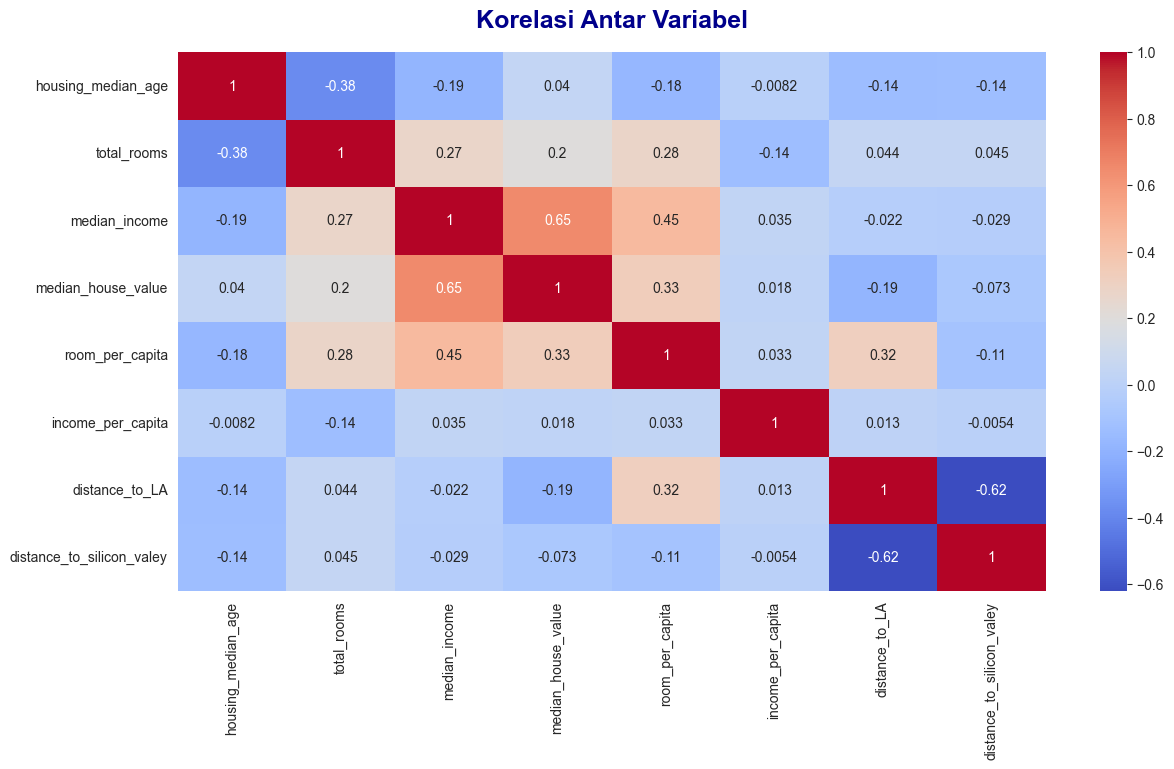

In [32]:
# visualisasi korelasi data baru df_low_vif
visualize_correlation(df_low_vif.select_dtypes(include='number'))

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FF5733"><b><span style='color:#FFFFFF'>3 |</span></b> <b>LINEAR REGRESSION</b></div>

Linear Regression adalah teknik dalam machine learning yang digunakan untuk memodelkan hubungan antara variabel independen dan variabel dependen melalui garis lurus sederhana. 

Berikut contoh visualisasinya untuk memudahkan pemahaman:

Text(1, 530000, '5-Fold CV R²: 0.417')

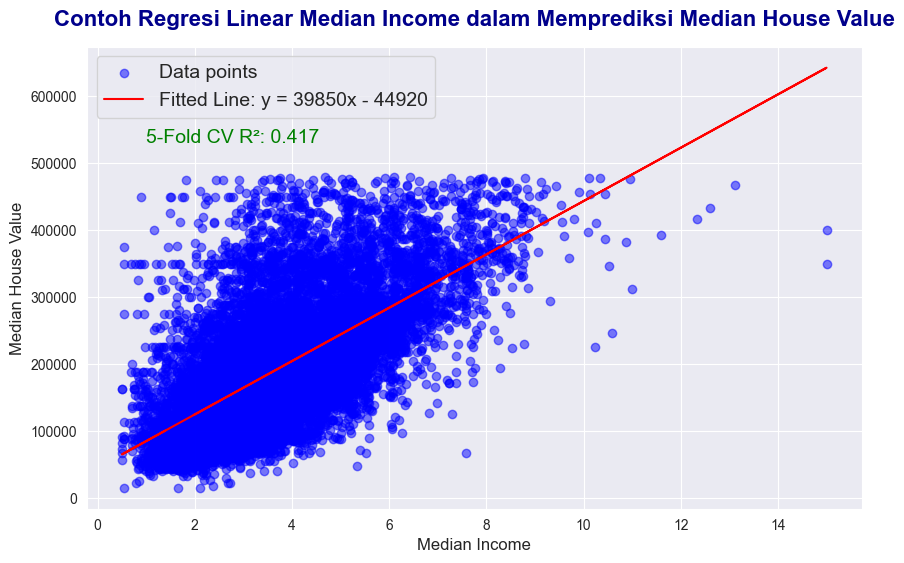

In [33]:
# Contoh data untuk visualisasi saja
X = df_low_vif[['median_income']] # Predictor/Feature
y = df_low_vif['median_house_value'] # Target
 
# Membangun model dan fitting model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Ekstrak koefisien untuk kebutuhan visualisasi dan pemahaman
intercept = int(linear_model.intercept_)
slope = int(linear_model.coef_[0]) #nilai target ketika predictor = 0
eqn = f"Fitted Line: y = {slope}x - {abs(intercept)}"

# cross validation untuk evaluasi model
cv_score = cross_val_score(linear_model, X, y, scoring='r2').mean()
 
# Visualisasi
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')

plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X, linear_model.predict(X), color="red", label=eqn) # plot garis linear terbaik

plt.title("Contoh Regresi Linear Median Income dalam Memprediksi Median House Value",
          pad=15, fontdict={'color': 'darkblue','weight': 'bold','fontsize': 16})
plt.xlabel("Median Income", fontsize=12)
plt.ylabel("Median House Value", fontsize=12)
plt.legend(fontsize=14)

plt.text(1, 530000, f"5-Fold CV R²: {cv_score:.3f}", fontsize=14, color="green")


Dengan model regresi linear sederhana seperti di atas, Persamaan yang dihasilkan adalah:

𝑦 = 39850x − 44920

Sehingga artinya ---> untuk setiap peningkatan USD 10.000 pada median income, maka nilai median rumah diprediksi naik sebesar USD 39.850. Namun, model ini dimulai dengan intercept sebesar - USD 44.920, yang artinya jika median income adalah nol, nilai rumah akan negatif menurut model. Sehingga, ini tidak realistis. Hal ini menunjukkan bahwa hubungan tidak sepenuhnya ditangkap oleh model linear sederhana.

- **Note:** 1 unit pada median income mewakili median income rumah tangga dalam satuan USD 10.000

Nilai R² dari 5-fold cross-validation adalah 0.417, yang berarti `model ini mampu menjelaskan sekitar 41.7% variabilitas dari median house value berdasarkan median income. Dengan kata lain, 58.3% variabilitas dari median house value dipengaruhi oleh variabel lain, selain median income.`

Dari scatterplot, terlihat bahwa meskipun ada hubungan positif (semakin tinggi pendapatan median, semakin tinggi nilai rumah), data memiliki penyebaran yang sangat besar. Ada banyak titik yang jauh dari garis regresi (garis merah).

Meskipun regresi linear ini cukup mudah dipahami dan diterapkan, ada asumsi bahwa hubungan antara prediktor dan target adalah linier. Namun, ketika kita melihat data sebenarnya (misalnya dalam scatterplot), hubungan ini tidak benar-benar berupa garis lurus. Data dunia nyata tentunya memerlukan model yang lebih kompleks untuk menangkap pola yang tidak linear.

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>3.1 | Eksperimen 1: Linear Regression dengan Data yang Memiliki Skor VIF Tinggi (`df_new`)</span></b></p></div>

---> Membuktikan sensitivitas model linear terhadap multikolinearitas

In [34]:
X = df_new.drop('median_house_value', axis=1)
y = df_new['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10952, 16) (2739, 16) (10952,) (2739,)


In [35]:
numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

print (f"kolom numerik: {numeric_cols}")
print (f"kolom kategorik: {categoric_cols}")

kolom numerik: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'room_per_household', 'room_per_capita', 'bed_room_ratio', 'income_per_capita', 'distance_to_LA', 'distance_to_silicon_valey']
kolom kategorik: ['ocean_proximity', 'age_binned_custom']


In [36]:
numeric_transformer = ColumnTransformer(transformers=[
    ('scaler', RobustScaler(), numeric_cols)
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [37]:
# Kustomisasi fungsi evaluasi model dengan cv score untuk kemudahan evaluasi ke depannya
def model_eval (model,X,y, cv=5):
    results = {}

    kf = KFold(n_splits=cv, shuffle=True, random_state=0)

    # Cross-validation for MAE
    mae_scores = -1 * cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=12)
    results['MAE_Mean'] = round(np.mean(mae_scores), 3)
    results['MAE_Std'] = round(np.std(mae_scores), 3)

    # Cross-validation for RMSE
    rmse_scores = -1 * cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=12)
    results['RMSE_Mean'] = round(np.mean(rmse_scores), 3)
    results['RMSE_Std'] = round(np.std(rmse_scores), 3)

    # Cross-validation for R²
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2', n_jobs=12)
    results['R²_Mean'] = round(np.mean(r2_scores), 3)
    results['R²_Std'] = round(np.std(r2_scores), 3)

    return rmse_scores, mae_scores, r2_scores, results

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_lr, X, y)

In [38]:
def assign_results_to_df(model, X, y, index_name):
    if index_name is None or len(index_name) != 1:
        raise ValueError("Parameter 'index_names' harus berupa list dengan dua nama indeks.")
    
    # Membuat DataFrame dari hasil evaluasi
    result_df = pd.DataFrame([results], index=index_name)
    
    return result_df

lr_df = assign_results_to_df(pipeline_lr,X,y,index_name=['Linear Regression (High Vif)'])
lr_df

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  \
Linear Regression (High Vif)  41958.473  673.421  57088.681  1284.855   

                              R²_Mean  R²_Std  
Linear Regression (High Vif)     0.64   0.007

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>3.2 | Eksperimen 2: Linear Regression dengan Data yang Memiliki Skor VIF Rendah (`df_low_vif`)</span></b></p></div>

In [39]:
X = df_low_vif.drop('median_house_value', axis=1)
y = df_low_vif['median_house_value']

numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

print (f"kolom numerik: {numeric_cols}")
print (f"kolom kategorik: {categoric_cols}")

kolom numerik: ['housing_median_age', 'total_rooms', 'median_income', 'room_per_capita', 'income_per_capita', 'distance_to_LA', 'distance_to_silicon_valey']
kolom kategorik: ['ocean_proximity', 'age_binned_custom']


In [40]:
preprocessor = ColumnTransformer(transformers=[
    ('num', RobustScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_lr, X, y)

lr_df2 = assign_results_to_df(pipeline_lr,X,y,index_name=['Linear Regression (Low Vif)'])
pd.concat([lr_df, lr_df2])

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  \
Linear Regression (High Vif)  41958.473  673.421  57088.681  1284.855   
Linear Regression (Low Vif)   45041.403  964.192  60740.032  1752.123   

                              R²_Mean  R²_Std  
Linear Regression (High Vif)    0.640   0.007  
Linear Regression (Low Vif)     0.592   0.015

**Mengapa Dataset dengan Skor VIF Tinggi (Multikolinearitas Tinggi) Memiliki Performa Prediksi Lebih Baik dalam Model Parametrik seperti Linear Regression?**

Meskipun multikolinearitas umumnya dianggap merugikan dalam konteks interpretasi model, terutama karena meningkatkan varians pada estimasi koefisien, beberapa studi menunjukkan bahwa multikolinearitas tidak selalu mempengaruhi kemampuan prediktif model secara signifikan. Misalnya, `dalam situasi di mana tujuan utama model adalah membuat prediksi, dan bukan menginterpretasi koefisien, model dengan multikolinearitas bisa tetap bekerja dengan baik atau bahkan lebih baik, seperti yang mungkin terjadi dalam kasus di atas.`

Penelitian menunjukkan bahwa `selama tujuan utamanya adalah prediksi, multikolinearitas tidak selalu menjadi masalah serius`. Dalam beberapa kasus, meskipun variabel-variabel sangat berkorelasi satu sama lain, model masih bisa memberikan hasil prediksi yang akurat karena korelasi tersebut tidak selalu mempengaruhi variabel target secara negatif. Hal ini juga ditegaskan oleh beberapa ahli statistik yang berpendapat bahwa selama R² model dan prediksi tetap stabil, multikolinearitas bisa diabaikan.

- [(Statistics by Jim)](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)
- [(Towards Data Science)](https://towardsdatascience.com/how-to-detect-and-deal-with-multicollinearity-9e02b18695f1)
- [(Statistical Horizons)](https://statisticalhorizons.com/multicollinearity/)

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FF5733"><b><span style='color:#FFFFFF'>4 |</span></b> <b>RIDGE</b></div>

Terdapat model `regresi terregularisasi` yang merupakan perkembangan dari regresi linear dengan menambahkan penalti pada fungsi loss selama pelatihan data. Tujuan dari penalti ini adalah untuk menciptakan model yang lebih sederhana, yaitu model dengan nilai koefisien yang lebih kecil. Singkatnya, regularisasi membantu menghindari overfitting dengan "memaksa" model untuk lebih sederhana dan tidak terlalu berlebihan dalam menyesuaikan dirinya dengan data latih/training data. [(machinelearningmastery.com)](https://machinelearningmastery.com/ridge-regression-with-python/)

Ridge Regression adalah salah satu bentuk paling umum dari regresi terregularisasi, yang menggunakan penalti L2. Penalti L2 ini berfungsi untuk memberikan penalti kepada model jika koefisien regresinya terlalu besar. Sehingga, koefisien variabel input yang tidak terlalu penting (yang tidak memberikan kontribusi signifikan pada prediksi) akan "menyusut", atau lebih kecil.

Secara konsep, berikut adalah intinya:

- Dalam regresi linear biasa, model hanya fokus meminimalkan error antara prediksi dan target, tanpa memperhatikan seberapa besar koefisiennya. Hal ini bisa menyebabkan overfitting, terutama jika datanya kompleks atau memiliki banyak fitur.
- Ridge Regression menambahkan penalti L2, yang memperhitungkan ukuran koefisien regresi. Penalti ini akan menambah nilai ke dalam fungsi loss saat pelatihan, sehingga memaksa model untuk mempertimbangkan koefisien yang lebih kecil (menghindari nilai yang terlalu besar).
- Dengan demikian, Ridge Regression menjaga keseimbangan antara meminimalkan error dan menjaga koefisien tetap kecil.

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>4.1 | Eksperimen 3: Menguji Ridge Regresion pada Dataset dengan Multikolinearitas Tinggi(`df_new`)</span></b></p></div>

In [41]:
X = df_new.drop('median_house_value', axis=1)
y = df_new['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.2)

numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

print (f"kolom numerik: {numeric_cols}")
print (f"kolom kategorik: {categoric_cols}")

kolom numerik: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'room_per_household', 'room_per_capita', 'bed_room_ratio', 'income_per_capita', 'distance_to_LA', 'distance_to_silicon_valey']
kolom kategorik: ['ocean_proximity', 'age_binned_custom']


In [42]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

In [43]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

Text(0, 0.5, 'Root Mean Squared Error')

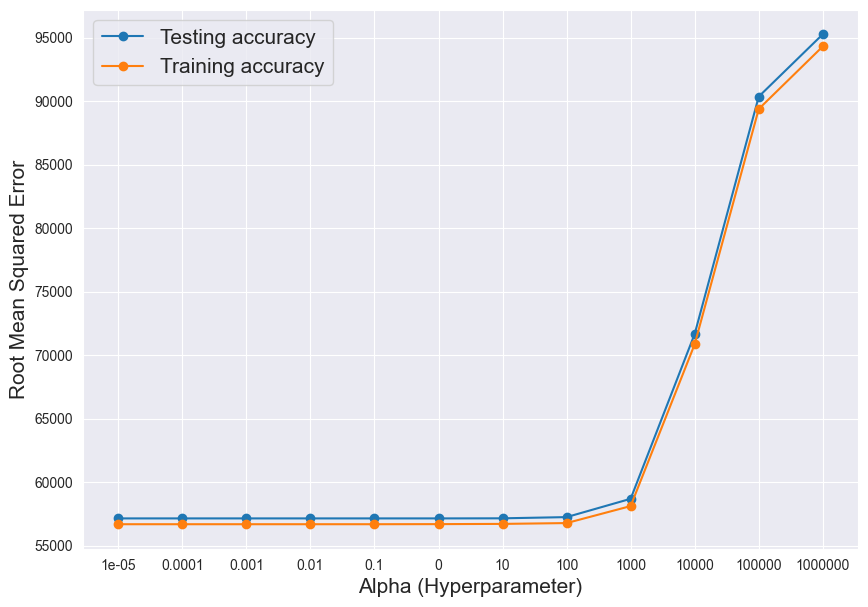

In [44]:
list_alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0, 10, 100,1000,10000, 100000, 1000000]
testing_rmse = []
training_rmse = []
score = 0

for i in list_alpha:
  ridgereg = Ridge(alpha = i)
  ridgereg.fit(X_train_transformed,y_train)

  y_predict_train = ridgereg.predict(X_train_transformed)
  training_rmse.append(root_mean_squared_error(y_train,y_predict_train))

  y_predict_test = ridgereg.predict(X_test_transformed)
  rmse_score = root_mean_squared_error(y_test,y_predict_test)
  testing_rmse.append(rmse_score)

  if score > -rmse_score:
    score = rmse_score
    best_c = i

length = range(len(list_alpha))

plt.figure(figsize=(10, 7))
plt.plot(length, testing_rmse, label='Testing accuracy', marker='o', linestyle='-')
plt.plot(length, training_rmse, label='Training accuracy', marker='o', linestyle='-')
plt.legend(fontsize=15)
plt.xticks(length, list_alpha)  # Menambahkan label pada sumbu x
plt.xlabel('Alpha (Hyperparameter)', fontsize=15)
plt.ylabel('Root Mean Squared Error', fontsize=15)

- Semakin tinggi alpha, justru semakin tinggi rmse yang dihasilkan, sehingga saya akan menetapkan alpha = 1

In [45]:
pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1)) #alpha adalah nilai regularisasinya
])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_ridge, X, y)

ridge_df = assign_results_to_df(pipeline_ridge,X,y,index_name=['Ridge Regression (High Vif)'])
ridge_df

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  R²_Mean  \
Ridge Regression (High Vif)  41957.545  689.078    57089.2  1303.881     0.64   

                             R²_Std  
Ridge Regression (High Vif)   0.007

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>4.2 | Eksperimen 4: Menguji Ridge Regresion pada Dataset dengan Multikolinearitas Rendah(`df_low_vif`)</span></b></p></div>

In [46]:
X = df_low_vif.drop('median_house_value', axis=1)
y = df_low_vif['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.2)

numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

print (f"kolom numerik: {numeric_cols}")
print (f"kolom kategorik: {categoric_cols}")

kolom numerik: ['housing_median_age', 'total_rooms', 'median_income', 'room_per_capita', 'income_per_capita', 'distance_to_LA', 'distance_to_silicon_valey']
kolom kategorik: ['ocean_proximity', 'age_binned_custom']


In [47]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

In [48]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

Text(0, 0.5, 'Root Mean Squared Error')

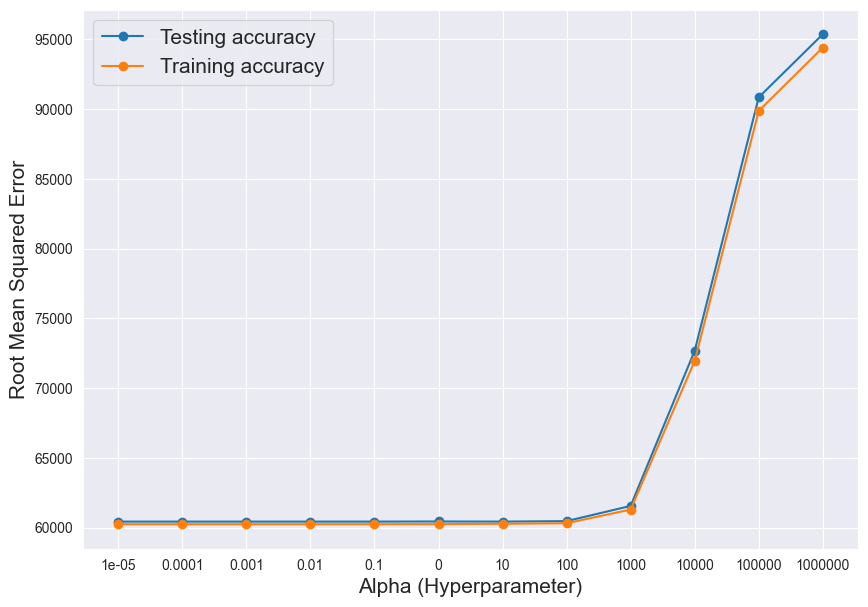

In [49]:
list_alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0, 10, 100,1000,10000, 100000, 1000000]
testing_rmse = []
training_rmse = []
score = 0

for i in list_alpha:
  ridgereg = Ridge(alpha = i)
  ridgereg.fit(X_train_transformed,y_train)

  y_predict_train = ridgereg.predict(X_train_transformed)
  training_rmse.append(root_mean_squared_error(y_train,y_predict_train))

  y_predict_test = ridgereg.predict(X_test_transformed)
  rmse_score = root_mean_squared_error(y_test,y_predict_test)
  testing_rmse.append(rmse_score)

  if score > -rmse_score:
    score = rmse_score
    best_c = i

length = range(len(list_alpha))

plt.figure(figsize=(10, 7))
plt.plot(length, testing_rmse, label='Testing accuracy', marker='o', linestyle='-')
plt.plot(length, training_rmse, label='Training accuracy', marker='o', linestyle='-')
plt.legend(fontsize=15)
plt.xticks(length, list_alpha)  # Menambahkan label pada sumbu x
plt.xlabel('Alpha (Hyperparameter)', fontsize=15)
plt.ylabel('Root Mean Squared Error', fontsize=15)

In [50]:
pipeline_ridge2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1)) #alpha adalah nilai regularisasinya
])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_ridge2, X, y)

ridge_df2 = assign_results_to_df(pipeline_ridge2,X,y,index_name=['Ridge Regression (Low Vif)'])
ridge_df2

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  R²_Mean  \
Ridge Regression (Low Vif)  45015.843  968.425  60714.828   1727.49    0.593   

                            R²_Std  
Ridge Regression (Low Vif)   0.014

In [51]:
# recap hasil
pd.concat([lr_df, lr_df2, ridge_df, ridge_df2])

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  \
Linear Regression (High Vif)  41958.473  673.421  57088.681  1284.855   
Linear Regression (Low Vif)   45041.403  964.192  60740.032  1752.123   
Ridge Regression (High Vif)   41957.545  689.078  57089.200  1303.881   
Ridge Regression (Low Vif)    45015.843  968.425  60714.828  1727.490   

                              R²_Mean  R²_Std  
Linear Regression (High Vif)    0.640   0.007  
Linear Regression (Low Vif)     0.592   0.015  
Ridge Regression (High Vif)     0.640   0.007  
Ridge Regression (Low Vif)      0.593   0.014

- Semakin tinggi alpha, justru semakin tinggi rmse yang dihasilkan, sehingga saya akan menetapkan alpha = 1
- Ridge Regression Memiliki Hasil Evaluasi Model yang Hampir Serupa dengan Linear Regression (karena nilai alpha terbaik hanya sebesar `1`).

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FF5733"><b><span style='color:#FFFFFF'>5 |</span></b> <b>DECISSION TREE REGRESSOR</b></div>

Decision Trees (DTs) adalah model "non-parametrik" yang belajar mengambil keputusan sederhana berdasarkan informasi yang ada dalam data. Algoritma ini mencoba membagi data menjadi kelompok-kelompok kecil berdasarkan aturan tertentu sampai dapat memberikan prediksi yang tepat untuk target. Jadi, pohon keputusan ini bertindak seperti rangkaian keputusan bertahap yang pada akhirnya memberikan hasil yang stabil pada setiap cabang. [(scikit-learn.org)](https://scikit-learn.org/stable/modules/tree.html)

"Non-parametrik" di sini artinya bahwa decision trees tidak mengasumsikan bentuk atau distribusi tertentu dari data. Ini berbeda dengan metode seperti regresi linear yang memiliki persamaan matematis spesifik (seperti garis lurus dengan kemiringan dan intercept). Decision trees lebih fleksibel dalam menangani berbagai bentuk data.

Berikut adalah contoh visualisasi decission tree untuk mempermudah pemahaman:

Text(0.5, 1.0, 'Visualisasi Decission Tree Sederhana - California Housing Dataset')

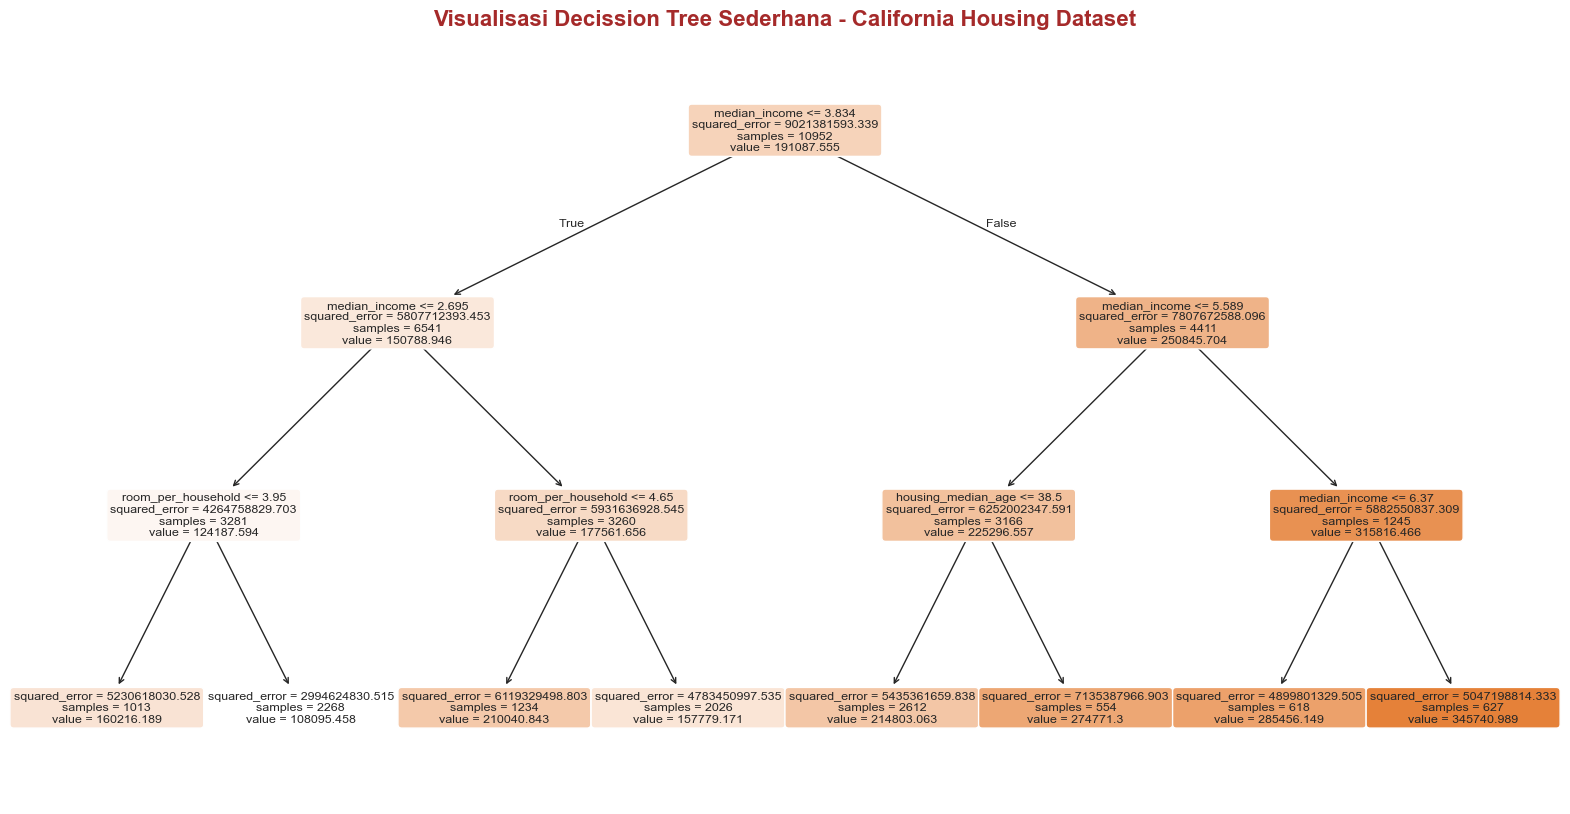

In [52]:
X = df_new.drop('median_house_value', axis=1)
y = df_new['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
num_cols = [col for col in X_train.columns if X_train[col].dtypes == 'float64']

# Simple DTs untuk visualisasi
dt_regressor = DecisionTreeRegressor(max_depth=3, random_state=0) # Kedalaman pohon ditetapkan menjadi 3 untuk kesederhanaan visual
dt_regressor.fit(X_train[num_cols], y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, feature_names=X_train[num_cols].columns, filled=True, rounded=True)
plt.title("Visualisasi Decission Tree Sederhana - California Housing Dataset", fontdict={
                                                        'color': 'brown',
                                                        'weight': 'bold',
                                                        'fontsize': 16})

Penjelasan Gambar:

- Perhatikan bagian paling atas dari pohon ini. Bagian paling atas adalah Node Akar (Root Node). `median_income` digunakan sebagai fitur pertama untuk memecah data. Pemecahan pertama terjadi pada nilai `median_income <= 3.834`. `Fitur median_income adalah fitur yang paling penting, karena merupakan pembagi pertama dari decision tree, yang berarti fitur ini paling berpengaruh dalam memprediksi harga rumah.`

- Cabang Kiri (True - median_income <= 2.695). Pada cabang ini, rata-rata nilai rumah (value) lebih rendah yaitu $ 150788.946. Pada setiap cabang berikutnya, data dipisahkan lagi menjadi dua sub-cabang, masing-masing berdasarkan kriteria tambahan room_per_household.

- Cabang Kanan (False - median_income <= 5.589). Pada cabang ini, rata-rata nilai rumah (value) lebih tinggi yaitu $ 250845.704. Pada setiap cabang berikutnya, data dipisahkan lagi menjadi dua sub-cabang berdasarkan kriteria tambahan housing_median_age.

- Node paling bawah disebut sebagai leaf, yang merupakan hasil akhir dari pengelompokan data. Cara membaca leaf node ==> `squared_eror` adalah kuadrat kesalahan prediksi. `Value` pada leaf node adalah nilai prediksi paling akhir dari `median_house_value` untuk data dalam kelompok tersebut. `samples` adalah jumlah sample data pada kelompok data.

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>5.1 | Eksperimen 5: Menguji Decission Tree Regressor pada Dataset dengan Multikolinearitas Tinggi(`df_new`)</span></b></p></div>

In [53]:
numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

print (f"kolom numerik: {numeric_cols}")
print (f"kolom kategorik: {categoric_cols}")

kolom numerik: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'room_per_household', 'room_per_capita', 'bed_room_ratio', 'income_per_capita', 'distance_to_LA', 'distance_to_silicon_valey']
kolom kategorik: ['ocean_proximity', 'age_binned_custom']


In [54]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=0))])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_dt, X, y)
dt_df = assign_results_to_df(pipeline_dt,X,y,index_name=['Decission Tree (High Vif)'])
dt_df

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  R²_Mean  \
Decission Tree (High Vif)  40154.718  520.039  60751.601   735.276    0.592   

                           R²_Std  
Decission Tree (High Vif)   0.014

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>5.2 | Eksperimen 6: Menguji Decission Tree Regressor pada Dataset dengan Multikolinearitas Rendah(`df_low_vif`)</span></b></p></div>

In [55]:
X = df_low_vif.drop('median_house_value', axis=1)
y = df_low_vif['median_house_value']

numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

print (f"kolom numerik: {numeric_cols}")
print (f"kolom kategorik: {categoric_cols}")

kolom numerik: ['housing_median_age', 'total_rooms', 'median_income', 'room_per_capita', 'income_per_capita', 'distance_to_LA', 'distance_to_silicon_valey']
kolom kategorik: ['ocean_proximity', 'age_binned_custom']


In [56]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

pipeline_dt2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=0))
])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_dt2, X, y)

dt_df2 = assign_results_to_df(pipeline_dt2,X,y,index_name=['Decission Tree (Low Vif)'])
pd.concat([dt_df, dt_df2])

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  R²_Mean  \
Decission Tree (High Vif)  40154.718  520.039  60751.601   735.276    0.592   
Decission Tree (Low Vif)   41688.774  980.855  63106.371  1581.799    0.560   

                           R²_Std  
Decission Tree (High Vif)   0.014  
Decission Tree (Low Vif)    0.016

In [57]:
# recap hasil
pd.concat([lr_df,lr_df2,
           ridge_df,ridge_df2,
           dt_df, dt_df2]).sort_values('RMSE_Mean')

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  \
Linear Regression (High Vif)  41958.473  673.421  57088.681  1284.855   
Ridge Regression (High Vif)   41957.545  689.078  57089.200  1303.881   
Ridge Regression (Low Vif)    45015.843  968.425  60714.828  1727.490   
Linear Regression (Low Vif)   45041.403  964.192  60740.032  1752.123   
Decission Tree (High Vif)     40154.718  520.039  60751.601   735.276   
Decission Tree (Low Vif)      41688.774  980.855  63106.371  1581.799   

                              R²_Mean  R²_Std  
Linear Regression (High Vif)    0.640   0.007  
Ridge Regression (High Vif)     0.640   0.007  
Ridge Regression (Low Vif)      0.593   0.014  
Linear Regression (Low Vif)     0.592   0.015  
Decission Tree (High Vif)       0.592   0.014  
Decission Tree (Low Vif)        0.560   0.016

Dari model linear hingga Decission Tree, skor evaluasi keseluruhan masih "dimenangkan" oleh prediksi menggunakan data high vif (df_new)

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FF5733"><b><span style='color:#FFFFFF'>6 |</span></b> <b>RANDOM FOREST REGRESSOR</b></div>

`Forest` (hutan) mengacu pada kumpulan banyak `decision trees`. Jadi, alih-alih hanya menggunakan satu pohon untuk membuat keputusan, algoritma random forest menggunakan banyak pohon sekaligus. Hasil akhirnya adalah kita mendapatkan rata-rata dari hasil keputusan seluruh pohon di hutan (forest) tersebut, sehingga membuat prediksi lebih akurat dan stabil dibandingkan dengan hanya menggunakan satu decision tree.

Kenapa disebut 'random' forest? Pertama, setiap pohon dalam hutan dibuat menggunakan subset acak dari data yang tersedia. Jadi, data yang digunakan untuk melatih setiap pohon itu berbeda-beda. Kedua, pada setiap cabang dari setiap pohon, hanya beberapa fitur acak saja yang dipilih untuk membuat keputusan (bukan menggunakan semua fitur sekaligus). Hal ini membantu mengurangi korelasi antara pohon-pohon di dalam hutan, sehingga prediksi lebih bervariasi dan menghindari `overfitting`. Dengan demikian, random forest lebih tahan terhadap overfitting dan multikolinearitas dibandingkan decission tree (lihat bab 7 di atas). 
[(towardsdatascience.com)](https://towardsdatascience.com/random-forest-in-simple-english-why-is-it-so-popular-3ba04d0374d)

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>6.1 | Eksperimen 7: Random Forest Regressor pada Dataset dengan Multikolinearitas Tinggi(`df_new`)</span></b></p></div>

In [58]:
X = df_new.drop('median_house_value', axis=1)
y = df_new['median_house_value']

numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

print (f"kolom numerik: {numeric_cols}")
print (f"kolom kategorik: {categoric_cols}")

kolom numerik: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'room_per_household', 'room_per_capita', 'bed_room_ratio', 'income_per_capita', 'distance_to_LA', 'distance_to_silicon_valey']
kolom kategorik: ['ocean_proximity', 'age_binned_custom']


In [59]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=0,n_jobs=-1))
])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_rf, X, y)
rf_df = assign_results_to_df(pipeline_rf,X,y,index_name=['Random Forest (High Vif)'])
rf_df

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  R²_Mean  \
Random Forest (High Vif)  28335.018  797.648  42634.899  1559.833    0.799   

                          R²_Std  
Random Forest (High Vif)   0.009

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>6.2 | Eksperimen 8: Random Forest Regressor pada Dataset dengan Multikolinearitas Rendah(`df_low_vif`)</span></b></p></div>

In [60]:
X = df_low_vif.drop('median_house_value', axis=1)
y = df_low_vif['median_house_value']

numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

print (f"kolom numerik: {numeric_cols}")
print (f"kolom kategorik: {categoric_cols}")

kolom numerik: ['housing_median_age', 'total_rooms', 'median_income', 'room_per_capita', 'income_per_capita', 'distance_to_LA', 'distance_to_silicon_valey']
kolom kategorik: ['ocean_proximity', 'age_binned_custom']


In [61]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

pipeline_rf2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=0,n_jobs=-1))
])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_rf2, X, y)
rf_df2 = assign_results_to_df(pipeline_rf2,X,y,index_name=['Random Forest (Low Vif)'])
pd.concat([rf_df,rf_df2])

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  R²_Mean  \
Random Forest (High Vif)  28335.018  797.648  42634.899  1559.833    0.799   
Random Forest (Low Vif)   29915.750  811.134  44647.907  1536.929    0.780   

                          R²_Std  
Random Forest (High Vif)   0.009  
Random Forest (Low Vif)    0.010

In [62]:
# recap hasil
pd.concat([lr_df,lr_df2,
           ridge_df,ridge_df2,
           dt_df, dt_df2,
           rf_df,rf_df2]).sort_values('RMSE_Mean')

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  \
Random Forest (High Vif)      28335.018  797.648  42634.899  1559.833   
Random Forest (Low Vif)       29915.750  811.134  44647.907  1536.929   
Linear Regression (High Vif)  41958.473  673.421  57088.681  1284.855   
Ridge Regression (High Vif)   41957.545  689.078  57089.200  1303.881   
Ridge Regression (Low Vif)    45015.843  968.425  60714.828  1727.490   
Linear Regression (Low Vif)   45041.403  964.192  60740.032  1752.123   
Decission Tree (High Vif)     40154.718  520.039  60751.601   735.276   
Decission Tree (Low Vif)      41688.774  980.855  63106.371  1581.799   

                              R²_Mean  R²_Std  
Random Forest (High Vif)        0.799   0.009  
Random Forest (Low Vif)         0.780   0.010  
Linear Regression (High Vif)    0.640   0.007  
Ridge Regression (High Vif)     0.640   0.007  
Ridge Regression (Low Vif)      0.593   0.014  
Linear Regression (Low Vif)     0.592   0.015  
Decission Tree (High Vif)       0.592   0.014  
Decission Tree (Low Vif)        0.560   0.016

- Performa model meningkat drastis ketika beralih ke model ensemble

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FF5733"><b><span style='color:#FFFFFF'>7 |</span></b> <b>GRADIENT BOOSTING</b></div>

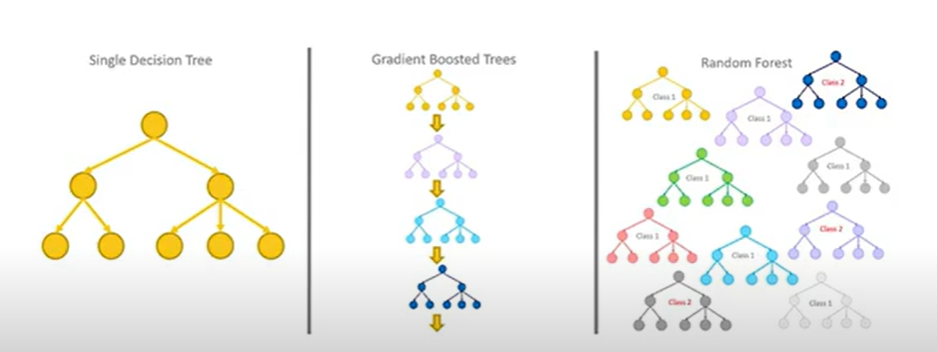

Gradient Boosting mengacu pada kumpulan banyak decision trees yang `disusun secara bertahap` untuk meningkatkan akurasi prediksi. Berbeda dengan Random Forest yang membuat keputusan langsung menggunakan banyak pohon secara paralel, `Gradient Boosting membangun model secara sekuensial. Setiap pohon baru mencoba untuk memperbaiki kesalahan yang dibuat oleh pohon sebelumnya.`

Bagaimana cara kerjanya?

Algoritma gradient boosting bekerja dengan memprediksi residuals (selisih antara prediksi sebelumnya dengan nilai aktual) dan menambahkan pohon baru yang difokuskan pada kesalahan tersebut. Pohon baru yang ditambahkan akan mencoba meminimalkan kesalahan dengan menggunakan informasi dari gradien kesalahan (karena itu dinamakan "gradient", pada grafik kemiringan/gradient akan semakin berkurang kecuramannya saat kesalahan sudah tidak bisa diminimalisir lagi). Proses ini berulang hingga kesalahan keseluruhan pada model diminimalkan.

Mengapa disebut "boosting"?

Dalam konteks ini, boosting berarti model dibangun secara bertahap dan setiap pohon baru mendorong kinerja model menjadi lebih baik. Model-model yang lebih lemah secara berurutan disatukan untuk membentuk model yang lebih kuat. Dengan terus-menerus belajar dari kesalahan prediksi sebelumnya, Gradient Boosting "boosts" (meningkatkan) performa model.

Seperti Random Forest, Gradient Boosting juga menggunakan decision trees, tetapi dengan cara yang berbeda. Random Forest menciptakan beberapa pohon secara acak dan rata-ratanya untuk membuat prediksi, Gradient Boosting menciptakan pohon secara bertahap dan memperbaiki kesalahan model di setiap iterasi. Setiap pohon baru yang ditambahkan berfokus pada meminimalkan kesalahan dari model sebelumnya. Hal ini membuat gradient boosting lebih akurat, tetapi juga lebih rentan terhadap overfitting dibandingkan dengan Random Forest jika tidak diatur dengan benar. Untuk mengatasi hal ini, beberapa parameter seperti learning rate dan subsampling digunakan untuk mengontrol kecepatan belajar dan jumlah data yang digunakan oleh setiap pohon.

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>7.1 | Eksperimen 9: Gradient Boosting pada Dataset dengan Multikolinearitas Tinggi(`df_new`)</span></b></p></div>

In [63]:
X = df_new.drop('median_house_value', axis=1)
y = df_new['median_house_value']

numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

print (f"kolom numerik: {numeric_cols}")
print (f"kolom kategorik: {categoric_cols}")

kolom numerik: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'room_per_household', 'room_per_capita', 'bed_room_ratio', 'income_per_capita', 'distance_to_LA', 'distance_to_silicon_valey']
kolom kategorik: ['ocean_proximity', 'age_binned_custom']


In [64]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=0))
])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_gb, X, y)
gb_df = assign_results_to_df(pipeline_gb,X,y,index_name=['Gradient Boosting (High Vif)'])
gb_df


MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  \
Gradient Boosting (High Vif)  32798.709  846.595  46781.327  1415.448   

                              R²_Mean  R²_Std  
Gradient Boosting (High Vif)    0.758    0.01

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>7.2 | Eksperimen 10: Gradient Boosting pada Dataset dengan Multikolinearitas Rendah(`df_low_vif`)</span></b></p></div>

In [65]:
X = df_low_vif.drop('median_house_value', axis=1)
y = df_low_vif['median_house_value']

numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

print (f"kolom numerik: {numeric_cols}")
print (f"kolom kategorik: {categoric_cols}")

kolom numerik: ['housing_median_age', 'total_rooms', 'median_income', 'room_per_capita', 'income_per_capita', 'distance_to_LA', 'distance_to_silicon_valey']
kolom kategorik: ['ocean_proximity', 'age_binned_custom']


In [66]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

pipeline_gb2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=0))
])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_gb2, X, y)
gb_df2 = assign_results_to_df(pipeline_gb2,X,y,index_name=['Gradient Boosting (Low Vif)'])
pd.concat([gb_df, gb_df2])


MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  \
Gradient Boosting (High Vif)  32798.709  846.595  46781.327  1415.448   
Gradient Boosting (Low Vif)   34648.274  841.614  49086.522  1378.726   

                              R²_Mean  R²_Std  
Gradient Boosting (High Vif)    0.758   0.010  
Gradient Boosting (Low Vif)     0.734   0.009

In [67]:
# recap hasil
pd.concat([lr_df,lr_df2,
           ridge_df,ridge_df2,
           dt_df, dt_df2,
           rf_df,rf_df2,
           gb_df,gb_df2]).sort_values('RMSE_Mean')

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  \
Random Forest (High Vif)      28335.018  797.648  42634.899  1559.833   
Random Forest (Low Vif)       29915.750  811.134  44647.907  1536.929   
Gradient Boosting (High Vif)  32798.709  846.595  46781.327  1415.448   
Gradient Boosting (Low Vif)   34648.274  841.614  49086.522  1378.726   
Linear Regression (High Vif)  41958.473  673.421  57088.681  1284.855   
Ridge Regression (High Vif)   41957.545  689.078  57089.200  1303.881   
Ridge Regression (Low Vif)    45015.843  968.425  60714.828  1727.490   
Linear Regression (Low Vif)   45041.403  964.192  60740.032  1752.123   
Decission Tree (High Vif)     40154.718  520.039  60751.601   735.276   
Decission Tree (Low Vif)      41688.774  980.855  63106.371  1581.799   

                              R²_Mean  R²_Std  
Random Forest (High Vif)        0.799   0.009  
Random Forest (Low Vif)         0.780   0.010  
Gradient Boosting (High Vif)    0.758   0.010  
Gradient Boosting (Low Vif)     0.734   0.009  
Linear Regression (High Vif)    0.640   0.007  
Ridge Regression (High Vif)     0.640   0.007  
Ridge Regression (Low Vif)      0.593   0.014  
Linear Regression (Low Vif)     0.592   0.015  
Decission Tree (High Vif)       0.592   0.014  
Decission Tree (Low Vif)        0.560   0.016

- Salah satu kekurangan utama Gradient Boosting dibandingkan dengan Random Forest dan XGBoost adalah terbatasnya kemampuan untuk melakukan paralelisasi proses pelatihan menggunakan parameter `n_jobs`

- Paralelisme membuat pelatihan data dilakukan secara lebih efisien pada beberapa core CPU. Misal n_jobs = 10 --> pelatihan dilakukan pada 10 core CPU, sehingga prosesnya lebih cepat

- XGBoost adalah perbaikan dari Gradient Boosting yang telah dioptimalkan untuk kinerja dan efisiensi. Salah satu perbaikan utamanya adalah kemampuannya untuk melakukan paralelisasi selama proses pembuatan pohon, bahkan dalam konteks boosting, sehingga membuatnya lebih cepat dan lebih efisien dibandingkan Gradient Boosting tradisional. XGBoost juga mendukung penggunaan n_jobs untuk meningkatkan performa dalam lingkungan multi-core. Berikut ini penjelasan mengenai model XGBoost.

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FF5733"><b><span style='color:#FFFFFF'>8 |</span></b> <b>XTREME GRADIENT BOOSTING</b></div>

XGBoost adalah versi optimasi dari Gradient Boosting yang dirancang untuk bekerja lebih cepat dan efisien. Algoritma ini menambahkan teknik `regularisasi` untuk mencegah overfitting dan menggunakan optimasi seperti parallel processing agar dapat menangani dataset besar dengan lebih baik. Selain itu, XGBoost secara bertahap memperbaiki kesalahan dari pohon sebelumnya dengan cara yang lebih terarah dibandingkan Gradient Boosting, sehingga XGBoost adalah salah satu algoritma yang sangat populer untuk regresi dan prediksi dengan akurasi tinggi.

Regularisasi pada XGBoost mirip dengan konsep yang digunakan dalam model teregulerisasi seperti Ridge (L2) dan Lasso (L1) (lihat bagian 4), di mana kita menambahkan penalti untuk model yang terlalu kompleks. Dalam XGBoost, regularisasi tersebut diterapkan pada bobot setiap pohon agar model menjadi lebih sederhana. Selain itu dalam XGBoost, kita dapat menetapkan nilai L1 dan L2 sekaligus.

- L1 Regularization (Lasso) membuat beberapa bobot menjadi nol, sehingga efektif dalam menghasilkan model yang lebih simpel dan mudah diinterpretasi
- L2 Regularization (Ridge) mengurangi nilai bobot yang terlalu besar, menjaga model dan mencegahnya dari overfitting

**Cara Kerja XGBoost (mirip dengan cara kerja gradient boost, tetapi lebih optimal):**

XGBoost memulai prediksi awal dengan sederhana, misalnya dimulai dengan mempredikssi rata-rata dari nilai target. Setelah itu, algoritma membangun pohon keputusan untuk memperbaiki kesalahan dari prediksi awal. XGBoost belajar dari kesalahan ini menggunakan pendekatan yang disebut _gradient boosting_, yaitu dengan mengurangi error secara bertahap (lihat bagian 7).

Setiap kali menambahkan pohon baru, model berusaha sedikit demi sedikit memperbaiki prediksi sebelumnya, sehingga model semakin akurat. Untuk mencegah model menjadi terlalu rumit dan overfitting, XGBoost menggunakan regularisasi, yaitu teknik yang membatasi bobot model agar tetap seimbang.

Selain itu, XGBoost bekerja sangat cepat karena menggunakan optimasi seperti paralelisasi, sehingga cocok untuk data yang besar dan kompleks.

[(xgboost.readthedocs.io)](https://xgboost.readthedocs.io/en/stable/parameter.html)

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>8.1 | Eksperimen 11: XGBoost Regressor pada Dataset dengan Multikolinearitas Tinggi(`df_new`)</span></b></p></div>

In [68]:
X = df_new.drop('median_house_value', axis=1)
y = df_new['median_house_value']

numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

print (f"kolom numerik: {numeric_cols}")
print (f"kolom kategorik: {categoric_cols}")


kolom numerik: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'room_per_household', 'room_per_capita', 'bed_room_ratio', 'income_per_capita', 'distance_to_LA', 'distance_to_silicon_valey']
kolom kategorik: ['ocean_proximity', 'age_binned_custom']


In [69]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=0,n_jobs=-1))
])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_xgb, X, y)
xgb_df = assign_results_to_df(pipeline_xgb,X,y,index_name=['XGBoost Regressor (High Vif)'])
xgb_df

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  \
XGBoost Regressor (High Vif)  27828.453  728.349  41737.549  1538.594   

                              R²_Mean  R²_Std  
XGBoost Regressor (High Vif)    0.807    0.01

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>8.2 | Eksperimen 12: XGBoost Regressor pada Dataset dengan Multikolinearitas Rendah(`df_low_vif`)</span></b></p></div>

In [70]:
X = df_low_vif.drop('median_house_value', axis=1)
y = df_low_vif['median_house_value']

numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

print (f"kolom numerik: {numeric_cols}")
print (f"kolom kategorik: {categoric_cols}")

kolom numerik: ['housing_median_age', 'total_rooms', 'median_income', 'room_per_capita', 'income_per_capita', 'distance_to_LA', 'distance_to_silicon_valey']
kolom kategorik: ['ocean_proximity', 'age_binned_custom']


In [71]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

pipeline_xgb2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=0,n_jobs=-1))
])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_xgb2, X, y)
xgb_df2 = assign_results_to_df(pipeline_xgb2,X,y,index_name=['XGBoost Regressor (Low Vif)'])
pd.concat([xgb_df,xgb_df2])


MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  \
XGBoost Regressor (High Vif)  27828.453  728.349  41737.549  1538.594   
XGBoost Regressor (Low Vif)   30282.674  670.749  44675.872  1416.892   

                              R²_Mean  R²_Std  
XGBoost Regressor (High Vif)    0.807   0.010  
XGBoost Regressor (Low Vif)     0.779   0.011

In [72]:
# recap hasil
pd.concat([lr_df,lr_df2,
           ridge_df,ridge_df2,
           dt_df, dt_df2,
           rf_df,rf_df2,
           gb_df,gb_df2,
           xgb_df,xgb_df2]).sort_values('RMSE_Mean')

MAE_Mean  MAE_Std  RMSE_Mean  RMSE_Std  \
XGBoost Regressor (High Vif)  27828.453  728.349  41737.549  1538.594   
Random Forest (High Vif)      28335.018  797.648  42634.899  1559.833   
Random Forest (Low Vif)       29915.750  811.134  44647.907  1536.929   
XGBoost Regressor (Low Vif)   30282.674  670.749  44675.872  1416.892   
Gradient Boosting (High Vif)  32798.709  846.595  46781.327  1415.448   
Gradient Boosting (Low Vif)   34648.274  841.614  49086.522  1378.726   
Linear Regression (High Vif)  41958.473  673.421  57088.681  1284.855   
Ridge Regression (High Vif)   41957.545  689.078  57089.200  1303.881   
Ridge Regression (Low Vif)    45015.843  968.425  60714.828  1727.490   
Linear Regression (Low Vif)   45041.403  964.192  60740.032  1752.123   
Decission Tree (High Vif)     40154.718  520.039  60751.601   735.276   
Decission Tree (Low Vif)      41688.774  980.855  63106.371  1581.799   

                              R²_Mean  R²_Std  
XGBoost Regressor (High Vif)    0.807   0.010  
Random Forest (High Vif)        0.799   0.009  
Random Forest (Low Vif)         0.780   0.010  
XGBoost Regressor (Low Vif)     0.779   0.011  
Gradient Boosting (High Vif)    0.758   0.010  
Gradient Boosting (Low Vif)     0.734   0.009  
Linear Regression (High Vif)    0.640   0.007  
Ridge Regression (High Vif)     0.640   0.007  
Ridge Regression (Low Vif)      0.593   0.014  
Linear Regression (Low Vif)     0.592   0.015  
Decission Tree (High Vif)       0.592   0.014  
Decission Tree (Low Vif)        0.560   0.016

- Dari rekap hasil evaluasi berbagai model di atas, saya memilih `XGBoost sebagai final model`. Sebab, dalam kondisi default (belum dilakukan hyperparameter tuning) pun XGBoost memiliki rmse (metrik utama) dan mae yang paling rendah. Selain itu, nilai R-squared nya juga mencapai 80%.

- Meskipun begitu, performa XGBoost dalam memprediksi data yang rendah vif masih tidak lebih baik dibandingkan Random Forest.

- Dengan demikian, final model dengan hyperparameter tuning akan dilakukan menggunakan data tinggi vif

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FF5733"><b><span style='color:#FFFFFF'>9 |</span></b> <b>FINAL MODEL: EXTREME GRADIENT BOOSTING</b></div>

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>9.1 | Hyperparameter Tuning pada XGBoostRegressor (Final Model) dengan Bayesian Optimization</span></b></p></div>

Hyperparameter adalah pengaturan atau parameter yang kita tentukan sebelum model dilatih. Hyperparameter berbeda dengan parameter model, yang dipelajari secara otomatis oleh model selama pelatihan.

Misalnya, jika kita membangun model Decision Tree untuk memprediksi harga rumah, salah satu hyperparameter dalam Decision Tree adalah kedalaman maksimum pohon (max_depth). Jika kita mengatur kedalaman pohon terlalu rendah, model bisa menjadi kurang akurat karena tidak mampu menangkap pola yang cukup dalam data (underfitting). Jika kita mengatur kedalaman pohon terlalu tinggi, model bisa memakan waktu lama untuk dilatih atau malah overfitting, di mana model terlalu menyesuaikan diri dengan data pelatihan dan gagal melakukan generalisasi pada data baru.

Hyperparameter tuning adalah suatu proses mencari kombinasi pengaturan terbaik (hyperparameter) untuk model machine learning agar model tersebut bisa bekerja dengan sebaik mungkin.

Beberapa metode yang biasa digunakan untuk hyperparameter tuning, yaitu:

- Manual Tuning: Mencoba pengaturan hyperparameter satu per satu berdasarkan tebakan atau pengalaman.
- Grid Search: Mencoba semua kombinasi hyperparameter dalam suatu rentang yang ditentukan. Namun, ini bisa sangat memakan waktu karena harus mencoba semua kombinasi.
- Random Search: Mencoba kombinasi hyperparameter secara acak. Random Search lebih efisien daripada Grid Search, karena tidak harus mencoba semua kombinasi.
- Bayesian Optimization: Metode yang lebih efisien dan cerdas. Model ini membangun model probabilistik dari fungsi yang ingin dioptimalkan (seperti validation error) dan mencoba memilih hyperparameter berdasarkan hasil sebelumnya.

[(amazon.com)](https://aws.amazon.com/what-is/hyperparameter-tuning/)

#### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>9.1.1 | Alasan Penggunaan Bayesian Optimization untuk Hyperparameter Tuning</span></b></p></div>

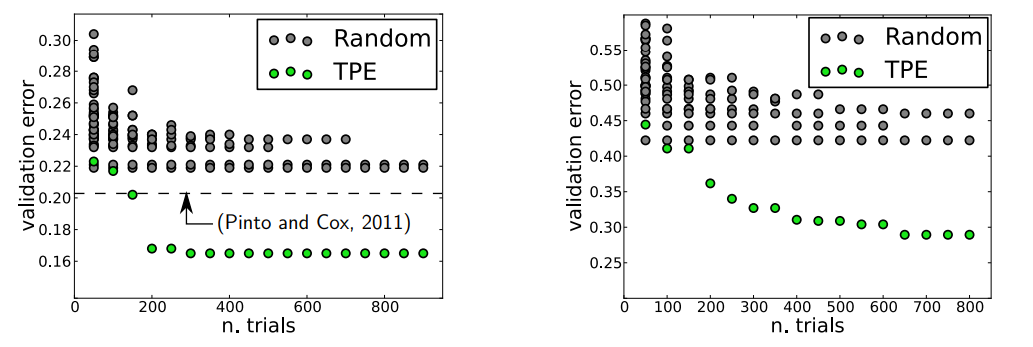

Gambar yang saya ambil dari [(paper bergstra et al)](https://proceedings.mlr.press/v28/bergstra13.pdf) di atas menunjukkan perbandingan antara Random Search (lingkaran abu-abu) dan Bayesian Optimization menggunakan TPE (lingkaran hijau) untuk mengoptimalkan hyperparameter pada neural network. Sumbu y (validation error) adalah kesalahan model pada dataset validasi (semakin kecil semakin baik). Sumbu x (n. trials) adalah jumlah eksperimen atau percobaan yang dilakukan untuk mencoba kombinasi hyperparameter yang berbeda.

Bayesian Optimization (TPE) cenderung menemukan kombinasi hyperparameter yang menghasilkan error lebih kecil (lebih baik) dengan lebih sedikit percobaan. Artinya, metode ini lebih efisien dalam menemukan pengaturan terbaik. Random Search memerlukan lebih banyak percobaan (n. trials) untuk mendapatkan hasil yang mendekati data aktual, tapi tetap tidak sebagus Bayesian Optimization.

Bayesian Optimization bekerja dengan membangun model probabilistik dari fungsi yang ingin dioptimalkan (seperti validation error). Alih-alih mencoba kombinasi hyperparameter secara acak, Bayesian Optimization memilih kombinasi hyperparameter yang paling menjanjikan berdasarkan model probabilistik yang telah dibuat dari percobaan sebelumnya.

Bayesian Optimization tidak mencoba kombinasi hyperparameter secara acak (seperti random search) atau menyeluruh (seperti grid search), tetapi mempelajari hasil dari percobaan sebelumnya dan menggunakan informasi tersebut untuk memutuskan hyperparameter apa yang harus diuji selanjutnya, sehingga waktu yang diperlukan untuk mencapai hasil terbaik menjadi jauh lebih singkat.

Seperti yang terlihat pada gambar, dengan jumlah percobaan yang lebih sedikit, Bayesian Optimization dapat menemukan pengaturan hyperparameter yang lebih baik dan lebih cepat dibandingkan Random Search dan Grid Search. Itulah alasan mengapa Bayesian Optimization digunakan pada notebook ini.

In [75]:
X = df_new.drop('median_house_value', axis=1)
y = df_new['median_house_value']

numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

X_transformed = preprocessor.fit_transform(X) # ini perlu dilakukan sebelum optimasi

In [76]:
def xgb_evaluate(n_estimators, learning_rate, max_depth, min_child_weight, subsample, colsample_bytree, gamma, reg_alpha, reg_lambda):
    model = XGBRegressor(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        min_child_weight=int(min_child_weight),
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        n_jobs=12,
        random_state=0
    )
    
    return np.mean(cross_val_score(model, X_transformed, y, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)) #X_train yang diproses adalah yang sudah ditransformasi


param_bounds = {
    'n_estimators': (100, 1000),
    'learning_rate': (0.007, 0.2),
    'max_depth': (5, 15),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 2.0),
    'reg_alpha': (0, 2.0),
    'reg_lambda': (0, 1.0)
}


optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=0)


optimizer.maximize(init_points=5, n_iter=20)


print(optimizer.max)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------


C:\Users\tamar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tamar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamar\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\tamar\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py", line 1108, in fit
    s

| 1         | nan       | 0.7744    | 1.43      | 0.1233    | 10.45     | 4.813     | 681.3     | 0.8752    | 0.8918    | 0.9818    |
| 2         | -4.057e+0 | 0.6917    | 1.583     | 0.1091    | 10.68     | 9.33      | 163.9     | 0.1743    | 0.02022   | 0.9163    |


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [1]:
pipeline_xg_tuned = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=0,
                           n_jobs = -1,
                           colsample_bytree=0.7,
                           gamma=0.05,
                           learning_rate=0.025,
                           max_depth=11,
                           min_child_weight=9,
                           reg_alpha=1.26,
                           reg_lambda=0.04,
                           n_estimators=684,
                           subsample=0.86))])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_xg_tuned, X, y)
xg_df_tuned = assign_results_to_df(pipeline_xg_tuned,X,y,index_name=['XGBRegressor Hyperparameter-Tuned (High Vif)'])
xg_df_tuned

NameError: name 'Pipeline' is not defined

In [75]:
# Perbandingan sebelum dan sesudah dituning
pd.concat([xgb_df,xg_df_tuned])

MAE_Mean  MAE_Std  RMSE_Mean  \
XGBoost Regressor (High Vif)                  27828.453  728.349  41737.549   
XGBRegressor Hyperparameter-Tuned (High Vif)  25857.587  659.252  39429.444   

                                              RMSE_Std  R²_Mean  R²_Std  
XGBoost Regressor (High Vif)                  1538.594    0.807   0.010  
XGBRegressor Hyperparameter-Tuned (High Vif)  1240.674    0.828   0.006

Perbedaan model sebelum dan sesudah dilakukan Hyperparameter Tuning:
- MAE menurun dengan selisih penurunan sebesar USD 1.970,9
- RMSE menurun dengan selisih penurunan sebesar USD 2.308,1

Artinya, model setelah tuning menjadi `lebih akurat`, dengan kesalahan prediksi yang lebih kecil dibandingkan sebelumnya.

- R² meningkat dari 80.7% menjadi 82.8%

Dengan demikian, model setelah tuning juga dapat `menjelaskan lebih banyak variasi dalam data`

- Standar deviasi pada masing-masing skor (MAE, RMSE, dan R²) juga semakin kecil. Artinya, model menjadi lebih stabil setelah tuning. Semakin kecil standar deviasi, semakin sedikit variasi antara hasil dari setiap fold dalam cross-validation, sehingga `performa model lebih konsisten pada data yang berbeda`.

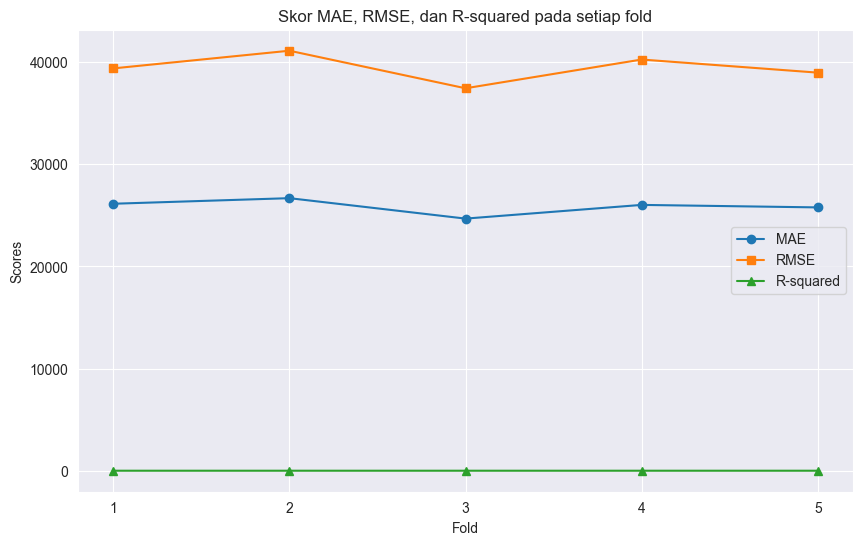

In [76]:
folds = np.arange(1,6)

plt.figure(figsize=(10, 6))

# Plot untuk MAE
plt.plot(folds, mae_scores, label='MAE', marker='o')

# Plot untuk RMSE
plt.plot(folds, rmse_scores, label='RMSE', marker='s')

# Plot untuk R-squared
plt.plot(folds, r2_scores, label='R-squared', marker='^')

# Menambahkan label dan judul
plt.xlabel('Fold')
plt.ylabel('Scores')
plt.title('Skor MAE, RMSE, dan R-squared pada setiap fold')
plt.xticks(folds)  # Menampilkan angka fold di sumbu x

# Menambahkan legend
plt.legend()


In [77]:
X = df_new.drop('median_house_value', axis=1)
y = df_new['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

pipeline_xgb.fit(X_train,y_train)
y_pred = pipeline_xgb.predict(X_test)
y_actual = y_test

In [78]:
pipeline_xg_tuned.fit(X_train,y_train)
y_pred_after_tuning = pipeline_xg_tuned.predict(X_test)
y_actual_after_tuning = y_test

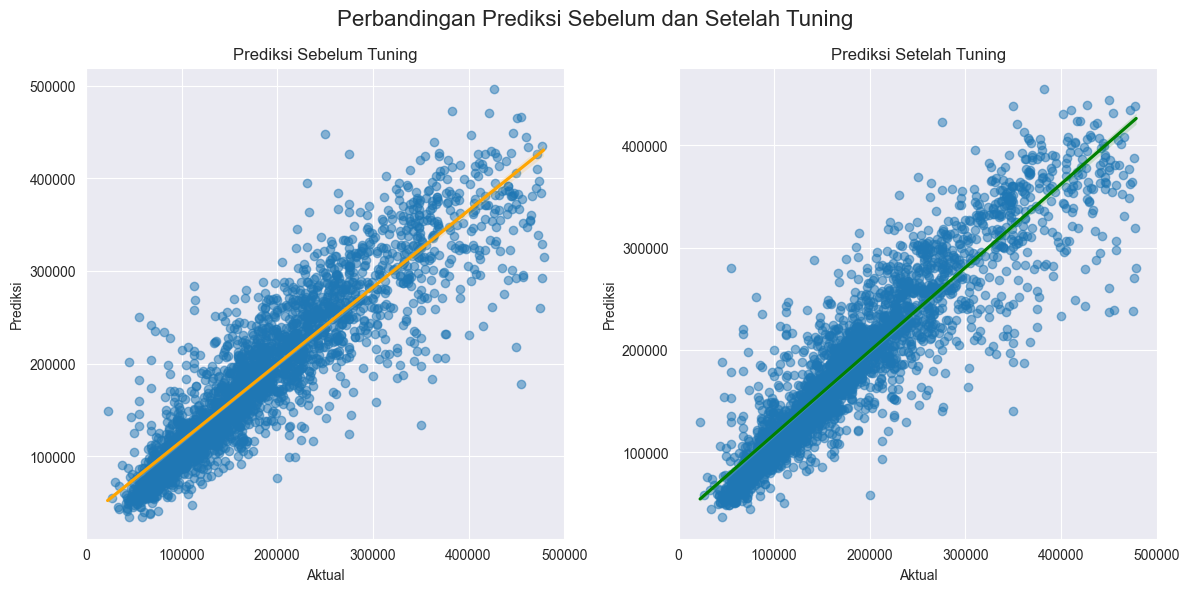

In [79]:
plt.figure(figsize=(12,6))
# Plot untuk prediksi sebelum tuning
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, subplot pertama
sns.regplot(x=y_actual, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'orange'}, label='Sebelum Tuning')
plt.title('Prediksi Sebelum Tuning')
plt.xlabel('Aktual')
plt.ylabel('Prediksi')

# Plot untuk prediksi setelah tuning
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, subplot kedua
sns.regplot(x=y_actual_after_tuning, y=y_pred_after_tuning, scatter_kws={'alpha':0.5}, line_kws={'color':'green'}, label='After Tuning')
plt.title('Prediksi Setelah Tuning')
plt.xlabel('Aktual')
plt.ylabel('Prediksi')

# Menambahkan judul utama
plt.suptitle('Perbandingan Prediksi Sebelum dan Setelah Tuning', fontsize=16)

plt.tight_layout()
plt.show()


- Plot regresi setelah tuning terlihat lebih rapat dibandingkan sebelum tuning. Konsistensi prediksi semkin meningkat, dan model lebih stabil setelah tuning.

- Titik data semakin menjauhi garis regresi setelah memprediksi nilai di atas 300000

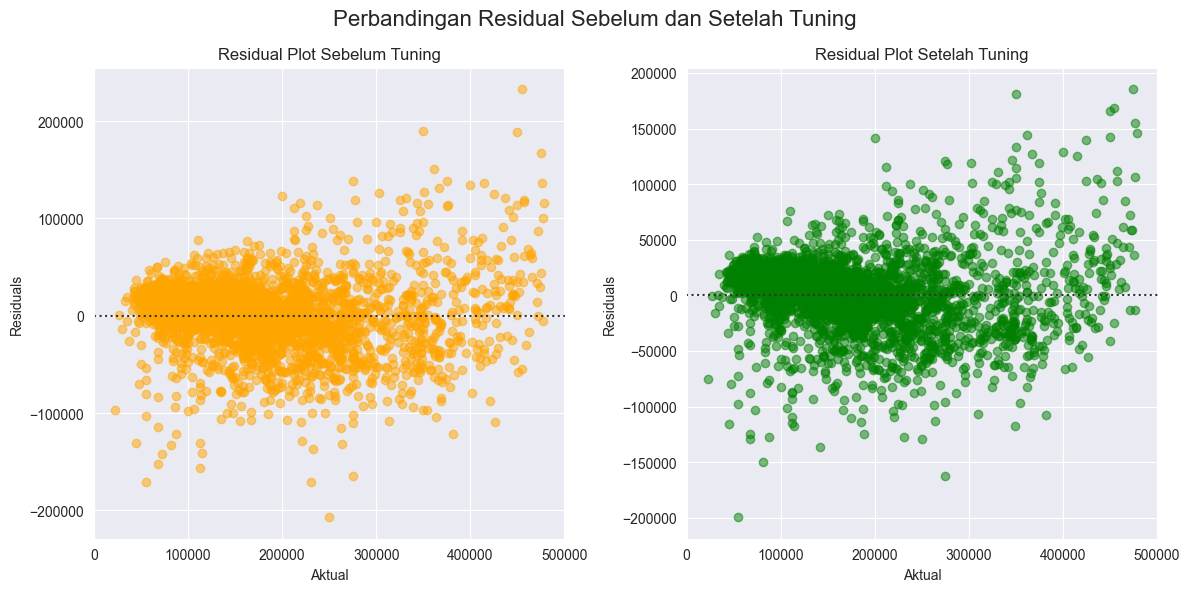

In [80]:
# Menghitung residual (selisih antara aktual dan prediksi)
residuals_before = y_actual - y_pred
residuals_after = y_actual_after_tuning - y_pred_after_tuning

plt.figure(figsize=(12,6))

# Plot residuals untuk prediksi sebelum tuning
plt.subplot(1, 2, 1)
sns.residplot(x=y_actual, y=residuals_before, scatter_kws={'alpha':0.5}, color='orange')
plt.title('Residual Plot Sebelum Tuning')
plt.xlabel('Aktual')
plt.ylabel('Residuals')

# Plot residuals untuk prediksi setelah tuning
plt.subplot(1, 2, 2)
sns.residplot(x=y_actual_after_tuning, y=residuals_after, scatter_kws={'alpha':0.5}, color='green')
plt.title('Residual Plot Setelah Tuning')
plt.xlabel('Aktual')
plt.ylabel('Residuals')

plt.suptitle('Perbandingan Residual Sebelum dan Setelah Tuning', fontsize=16)

plt.tight_layout()
plt.show()

- Model setelah tuning telah menjadi lebih stabil dan konsisten, di mana residunya yang lebih kecil di sebagian besar nilai aktual, terutama di area nilai di bawah `USD 300.000`.

- Terdapat indikasi bahwa model mengalami `heteroskedastisitas`, di mana kesalahan prediksi meningkat seiring dengan bertambahnya nilai aktual.

- Artinya, model cukup baik dalam melakukan prediksi untuk median_house_value di bawah `USD 300.000`.

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>9.2 | Feature Importance: Apa saja Fitur-Fitur yang Berdampak Signifikan dalam Memprediksi `median_house_value`? </span></b></p></div>

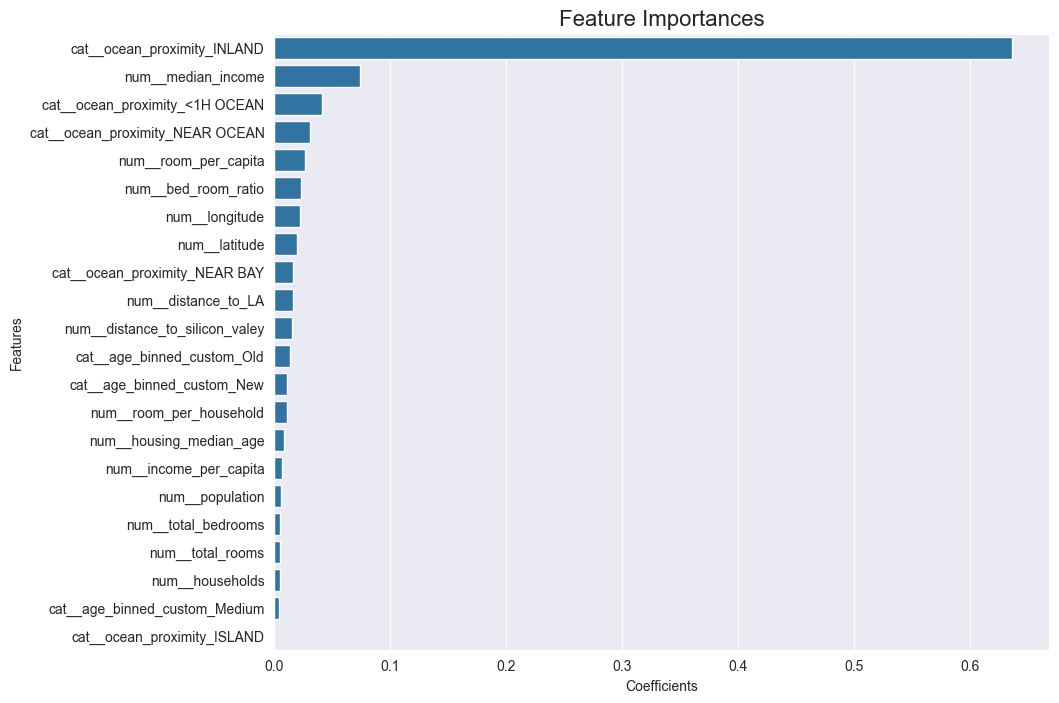

In [81]:
feature_importances = pd.DataFrame(pipeline_xg_tuned['model'].feature_importances_,
                                   preprocessor.get_feature_names_out(),
                                   columns=['Coefficients']).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficients', y=feature_importances.index, data=feature_importances)

plt.title('Feature Importances', fontsize=16)
plt.xlabel('Coefficients')
plt.ylabel('Features')

plt.show()

- Fitur `ocean_proximity`, khususnya untuk subset INLAND, adalah fitur yang paling dominan pengaruhnya dalam model ini.
- Fitur-fitur yang baru ditambahkan pada data asli, seperti `room_per_capita`, `bed_room_ratio`, `income_per_capita`, dan `room_per_household` justru memiliki kepentingan lebih signifikan dalam model, dibandingkan fitur awalnya (seperti `total_rooms, total_bedrooms, population, dan households`).
- Fitur `housing_median_age` bisa ditingkatkan importance-nya dengan cara dilakukan binning. Ini terbukti dari visualisasi di atas, di mana fitur baru `age_binned_house` memiliki koefisien importance yang lebih tinggi dibandingkan `housing_median_age`.
- Subset ISLAND dari `ocean_proximity` tidak memiliki pengaruh terhadap model, jadi bisa di drop saja atau kita bisa buat fitur baru bernama `proximity_to_water` yang mengelompokkan data berdasarkan kedekatannya ke wilayah perairan (`near water` atau `not near water`) saja, sehingga ISLAND bisa masuk ke dalam kelompok `near water`

### <div style="color:white;display:fill;border-radius:8px;font-size:90%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#FF5733'>9.3 | Eksperimen 13: Menggunakan Final Model dengan Data Baru yang Fiturnya Direduksi </span></b></p></div>

Pada sub-bagian ini, kita akan menguji performa model 

In [90]:
df_new_modified = df_new.copy()
# drop subset ISLAND dan drop 5 kolom dengan nilai importances terkecil
df_new_modified = df_new_modified[df_new_modified['ocean_proximity'] != 'ISLAND']

df_new_modified = df_new_modified.drop(columns=['total_rooms','total_bedrooms','households','population'])
df_new_modified.head()

longitude  latitude  housing_median_age  median_income  median_house_value  \
0    -119.79     36.73                52.0         1.9750             47500.0   
1    -122.21     37.77                43.0         2.2604            100000.0   
2    -118.04     33.87                17.0         6.2990            285800.0   
3    -118.28     34.06                17.0         1.7199            175000.0   
4    -119.81     36.73                50.0         2.2206             59200.0   

  ocean_proximity  room_per_household  room_per_capita  bed_room_ratio  \
0          INLAND                 2.8              0.6             0.2   
1        NEAR BAY                 3.7              1.2             0.3   
2       <1H OCEAN                 6.5              1.7             0.2   
3       <1H OCEAN                 2.5              0.8             0.5   
4          INLAND                 4.6              1.3             0.3   

   income_per_capita age_binned_custom  distance_to_LA  \
0                0.0               Old      328.621941   
1                0.0               Old      546.089439   
2                0.0               New       27.620821   
3                0.0               New        3.461242   
4                0.0               Old      329.402419   

   distance_to_silicon_valey  
0                 214.465646  
1                  44.539022  
2                 533.507029  
3                 503.012485  
4                 212.793912

In [95]:
X = df_new_modified.drop('median_house_value', axis=1)
y = df_new_modified['median_house_value']

numeric_cols = [col for col in X.columns if X[col].dtypes == 'float64']
categoric_cols = ['ocean_proximity','age_binned_custom']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
])

pipeline_xg_tuned2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=0,
                           n_jobs = -1,
                           colsample_bytree=0.7,
                           gamma=0.05,
                           learning_rate=0.025,
                           max_depth=11,
                           min_child_weight=9,
                           reg_alpha=1.26,
                           reg_lambda=0.04,
                           n_estimators=684,
                           subsample=0.86))])

rmse_scores, mae_scores, r2_scores, results = model_eval(pipeline_xg_tuned2, X, y)
xg_df_tuned2 = assign_results_to_df(pipeline_xg_tuned2,X,y,index_name=['XGB Regressor Hyperparameter-tuned dengan Reduksi Fitur'])
xg_df_tuned2

C:\Users\tamar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tamar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamar\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tamar\AppData\Roaming\Python\Python312\site-pack

MAE_Mean  MAE_Std  \
XGB Regressor Hyperparameter-tuned dengan Reduk...  25516.829  547.321   

                                                    RMSE_Mean  RMSE_Std  \
XGB Regressor Hyperparameter-tuned dengan Reduk...  38959.215   953.297   

                                                    R²_Mean  R²_Std  
XGB Regressor Hyperparameter-tuned dengan Reduk...      NaN     NaN

In [89]:
# perbandingan hasil
pd.concat([xgb_df, xg_df_tuned, xg_df_tuned2]).sort_values('RMSE_Mean')

MAE_Mean  MAE_Std  RMSE_Mean  \
XGB Regressor dengan Reduksi Fitur            25516.829  547.321  38959.215   
XGBRegressor Hyperparameter-Tuned (High Vif)  25857.587  659.252  39429.444   
XGBoost Regressor (High Vif)                  27828.453  728.349  41737.549   

                                              RMSE_Std  R²_Mean  R²_Std  
XGB Regressor dengan Reduksi Fitur             953.297    0.832   0.006  
XGBRegressor Hyperparameter-Tuned (High Vif)  1240.674    0.828   0.006  
XGBoost Regressor (High Vif)                  1538.594    0.807   0.010

- Dari tabel perbandingan skor metric evaluation di atas, terbukti bahwa final model bekerja lebih baik pada dataset baru yang fiturnya sudah direduksi (dari df_new --> df_new_modified). Terlihat dari nilai MAE dan RMSE nya yang menurun, serta R² yang meningkat. 
- Selain itu standar deviasi pada masing-masing skor (MAE, RMSE, dan R²) juga semakin kecil. Bahkan standar deviasi RMSE yang awalnya selalu di atas 1000, menurun menjadi 953.

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FF5733"><b><span style='color:#FFFFFF'>10 |</span></b> <b>KESIMPULAN & REKOMENDASI</b></div>

In [91]:
pd.concat([rb_df,rb_df2])

RMSE        MAE    R²
Rule Based Model (Outliers Tidak Dihapus)  92293.268  64165.779  0.36
Rule Based Model (Tanpa Outliers)          74306.075  53998.218  0.39

In [93]:
pd.concat([lr_df,lr_df2,
           ridge_df,ridge_df2,
           dt_df,dt_df2,
           rf_df,rf_df2,
           gb_df,gb_df2,
           xgb_df,xgb_df2,
           xg_df_tuned,xg_df_tuned2]).sort_values('RMSE_Mean')

MAE_Mean  MAE_Std  RMSE_Mean  \
XGB Regressor dengan Reduksi Fitur            25516.829  547.321  38959.215   
XGBRegressor Hyperparameter-Tuned (High Vif)  25857.587  659.252  39429.444   
XGBoost Regressor (High Vif)                  27828.453  728.349  41737.549   
Random Forest (High Vif)                      28335.018  797.648  42634.899   
Random Forest (Low Vif)                       29915.750  811.134  44647.907   
XGBoost Regressor (Low Vif)                   30282.674  670.749  44675.872   
Gradient Boosting (High Vif)                  32798.709  846.595  46781.327   
Gradient Boosting (Low Vif)                   34648.274  841.614  49086.522   
Linear Regression (High Vif)                  41958.473  673.421  57088.681   
Ridge Regression (High Vif)                   41957.545  689.078  57089.200   
Ridge Regression (Low Vif)                    45015.843  968.425  60714.828   
Linear Regression (Low Vif)                   45041.403  964.192  60740.032   
Decission Tree (High Vif)                     40154.718  520.039  60751.601   
Decission Tree (Low Vif)                      41688.774  980.855  63106.371   

                                              RMSE_Std  R²_Mean  R²_Std  
XGB Regressor dengan Reduksi Fitur             953.297    0.832   0.006  
XGBRegressor Hyperparameter-Tuned (High Vif)  1240.674    0.828   0.006  
XGBoost Regressor (High Vif)                  1538.594    0.807   0.010  
Random Forest (High Vif)                      1559.833    0.799   0.009  
Random Forest (Low Vif)                       1536.929    0.780   0.010  
XGBoost Regressor (Low Vif)                   1416.892    0.779   0.011  
Gradient Boosting (High Vif)                  1415.448    0.758   0.010  
Gradient Boosting (Low Vif)                   1378.726    0.734   0.009  
Linear Regression (High Vif)                  1284.855    0.640   0.007  
Ridge Regression (High Vif)                   1303.881    0.640   0.007  
Ridge Regression (Low Vif)                    1727.490    0.593   0.014  
Linear Regression (Low Vif)                   1752.123    0.592   0.015  
Decission Tree (High Vif)                      735.276    0.592   0.014  
Decission Tree (Low Vif)                      1581.799    0.560   0.016

- Model terbaik untuk dataset California Housing adalah XGBRegressor yang telah melalui Hyperparameter-Tuning serta fitur-fiturnya telah direduksi (direduksi dari dataset yang sudah melalui _feature engineering_, bukan sebelum). Kombinasi dari tuning dan reduksi fitur ini berhasil memaksimalkan performa model XGBoost. Bagi pihak-pihak yang ingin memaksimalkan akurasi prediksi harga properti di California, model ini adalah pilihan terbaik yang menggabungkan ketepatan prediksi dan kekuatan generalisasi.

- Rule-Based model adalah model yang dibangun dengan aturan sederhana "_if-then_" atau "_if-else_". Model rule-based berperan sebagai baseline model.

- Performa Rule-Based model meningkat signifikan setelah outliers pada data awal (df) dihapus, RMSE turun dari 92293.268 menjadi 74306.075, sehingga outliers memiliki dampak negatif dalam dataset ini.

- RMSE pada Rule-Based model tanpa outliers sebesar 74,306.075, sementara model terbaik menunjukkan penurunan drastis dalam RMSE menjadi 38,959.215. Dengan penurunan ini,  <span style="background-color: salmon">berbagai pihak yang menggunakan model ini dapat menekan kesalahan prediksi sebesar 35,346.86. Artinya, jika setiap unit kesalahan prediksi berkorelasi langsung dengan kerugian finansial, model terbaik ini mampu mengurangi potensi kerugian hampir 47.6% dibandingkan dengan model rule-based biasa yang hanya dihilangkan outliers-nya.</span>

- Dataset yang memiliki multikolinearitas (skor vif tinggi) justru meningkatkan performa seluruh model, dibandingkan dengan dataset yang memiliki skor vif < 10. Bahkan dataset tersebut juga meningkatkan performa model linear yang dianggap sensitif terhadap multikolinearitas.

- Penambahan fitur-fitur baru pada model—meskipun secara teknis meningkatkan multikolinearitas—nyatanya justru dapat meningkatkan performa model, terutama model ensemble. Model ensemble seperti XGBoost atau Random Forest memiliki mekanisme internal yang lebih robust terhadap multikolinearitas, sehingga dapat tetap memanfaatkan informasi dari fitur tambahan tanpa terpengaruh secara signifikan oleh korelasi antar fitur.

- Fitur-fitur baru dapat membantu model ensemble untuk menangkap lebih banyak variasi dan pola yang ada dalam data, sehingga dapat meningkatkan akurasi prediksi. Pada model ensemble, penambahan fitur ini tidak menghasilkan overfitting yang sama seperti pada model regresi linier tradisional, karena model ensemble dapat mengatasi masalah redundansi informasi/kemiripan informasi melalui pengambilan keputusan kolektif dari banyak pohon keputusan yang digunakan dalam proses prediksi.

- Fitur-fitur bawaan dari dataset menunjukkan skor importance yang jauh lebih kecil jika dibandingkan dengan fitur-fitur baru yang dihasilkan dari transformasi atau rekayasa fitur (_feature engineering_) terhadap fitur bawaan tersebut.

- Hyperparameter tuning dengan Bayesian Optimization dapat dilakukan dengan sangat cepat (kurang dari 10 menit, bahkan bisa kurang dari 5 menit tergantung jumlah iterasi yang diinginkan). Performa model yang sudah dituning dengan metode ini, meningkat dengan signifikan dalam seluruh metrik evaluasi (RMSE, MAE, R-Squared, bahkan Standar Deviasi dari masing-masing fold).